In [2]:
import utils as u
import config as c
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, friedmanchisquare, wilcoxon, ks_2samp
import statsmodels.stats.multitest as smm
from itertools import combinations
import statsmodels.formula.api as smf
from statsmodels.stats.multitest import multipletests
import itertools

sns.set_context("talk")
%load_ext autoreload
%autoreload 2

## Load


In [4]:
tdf = u.load_trials_df()
tdf = u.compute_days_relative_to_stage(tdf, 5) # compute days relative to stage 5

tdf["days_relative_to_stage_5_adj"] = tdf["days_relative_to_stage_5"] + 1

tdf = u.compute_days_relative_to_stage(tdf, 10)
tdf["days_relative_to_stage_10_adj"] = tdf["days_relative_to_stage_10"] + 1

Loading days data from directory: /Users/jessbreda/Desktop/github/jbreda_animal_training/notebooks/fixation_publication


## Days in Fixation Growthm


In [34]:
example_animal = "R050"
legend_labels = ["Fix Exp", "Legacy", "FixGrower", "Y"]
xlim = (None, 60)
ylim = (-.1, 2.6)

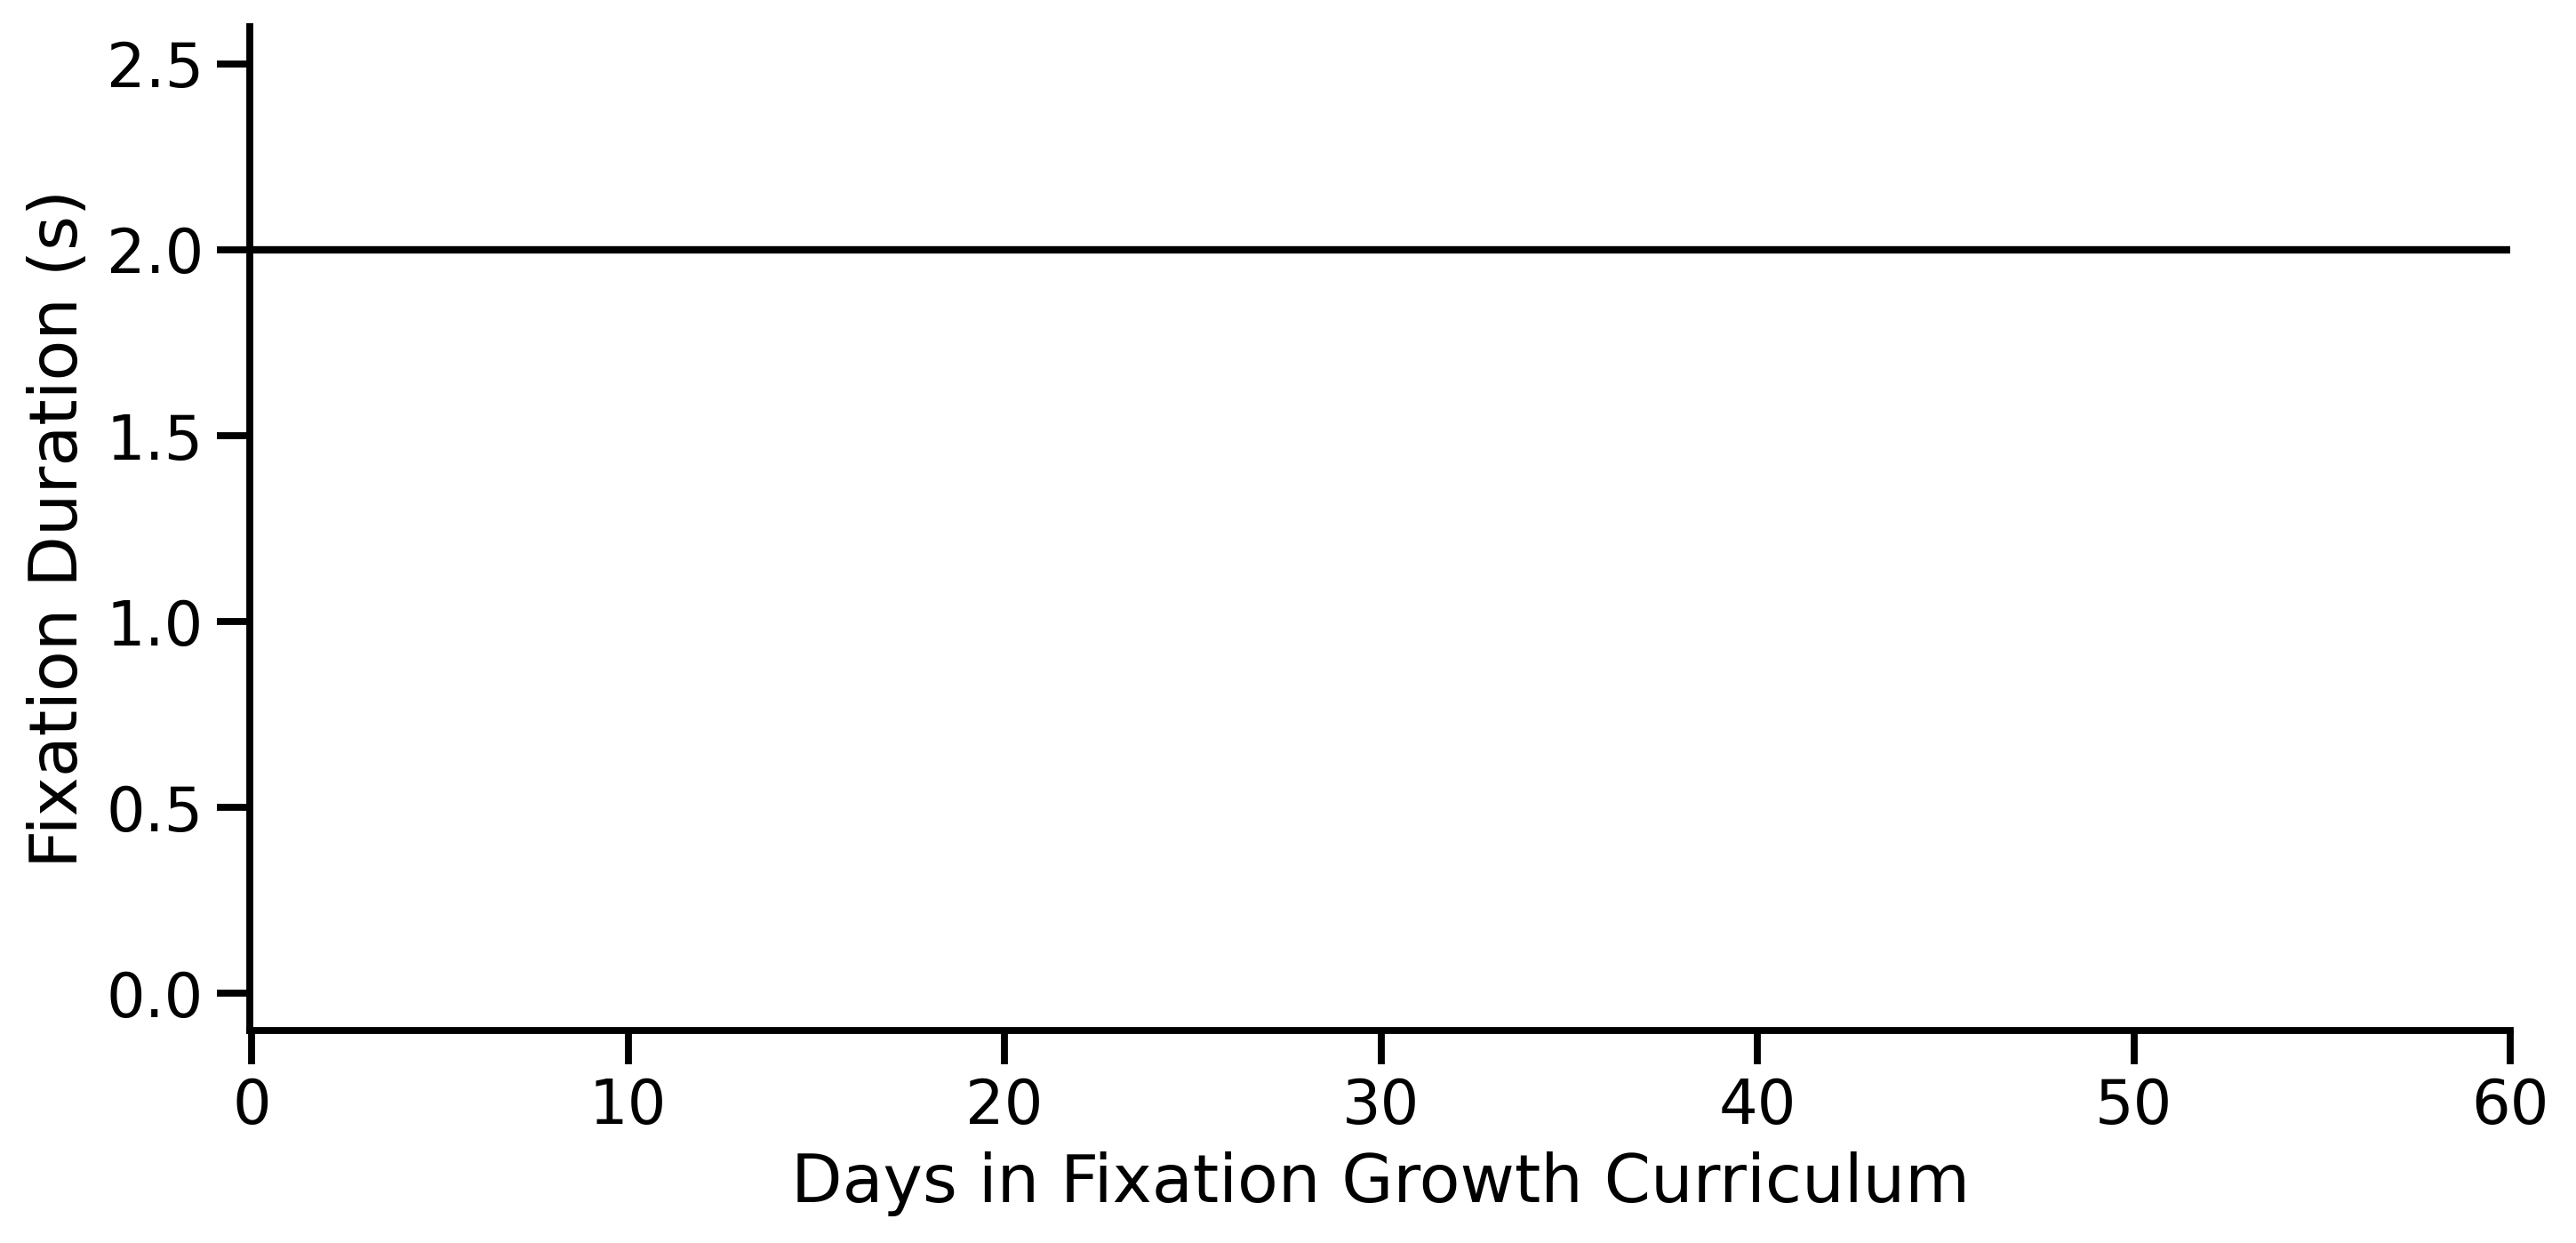

In [40]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
plot_df = tdf.query("stage in @c.GROWING_STAGES and animal_id == @example_animal")

sns.lineplot(
    data=plot_df,
    x="days_relative_to_stage_5_adj",
    y="fixation_dur",
    estimator="max",
    ax=ax,  
    hue="fix_experiment",
    hue_order=c.HUE_ORDER_EXP,
    palette=["white", "white"],
    style="animal_id",
    marker="o",
    alpha=0.75
)
# ax.grid()
ax.axhline(2, color="k", lw=2)
_ = ax.set(ylabel="Fixation Duration (s)", xlabel="Days in Fixation Growth Curriculum", xlim=xlim, ylim=ylim)

sns.despine()

# Remove the default legend with style information
ax.get_legend().remove()
plt.tight_layout()

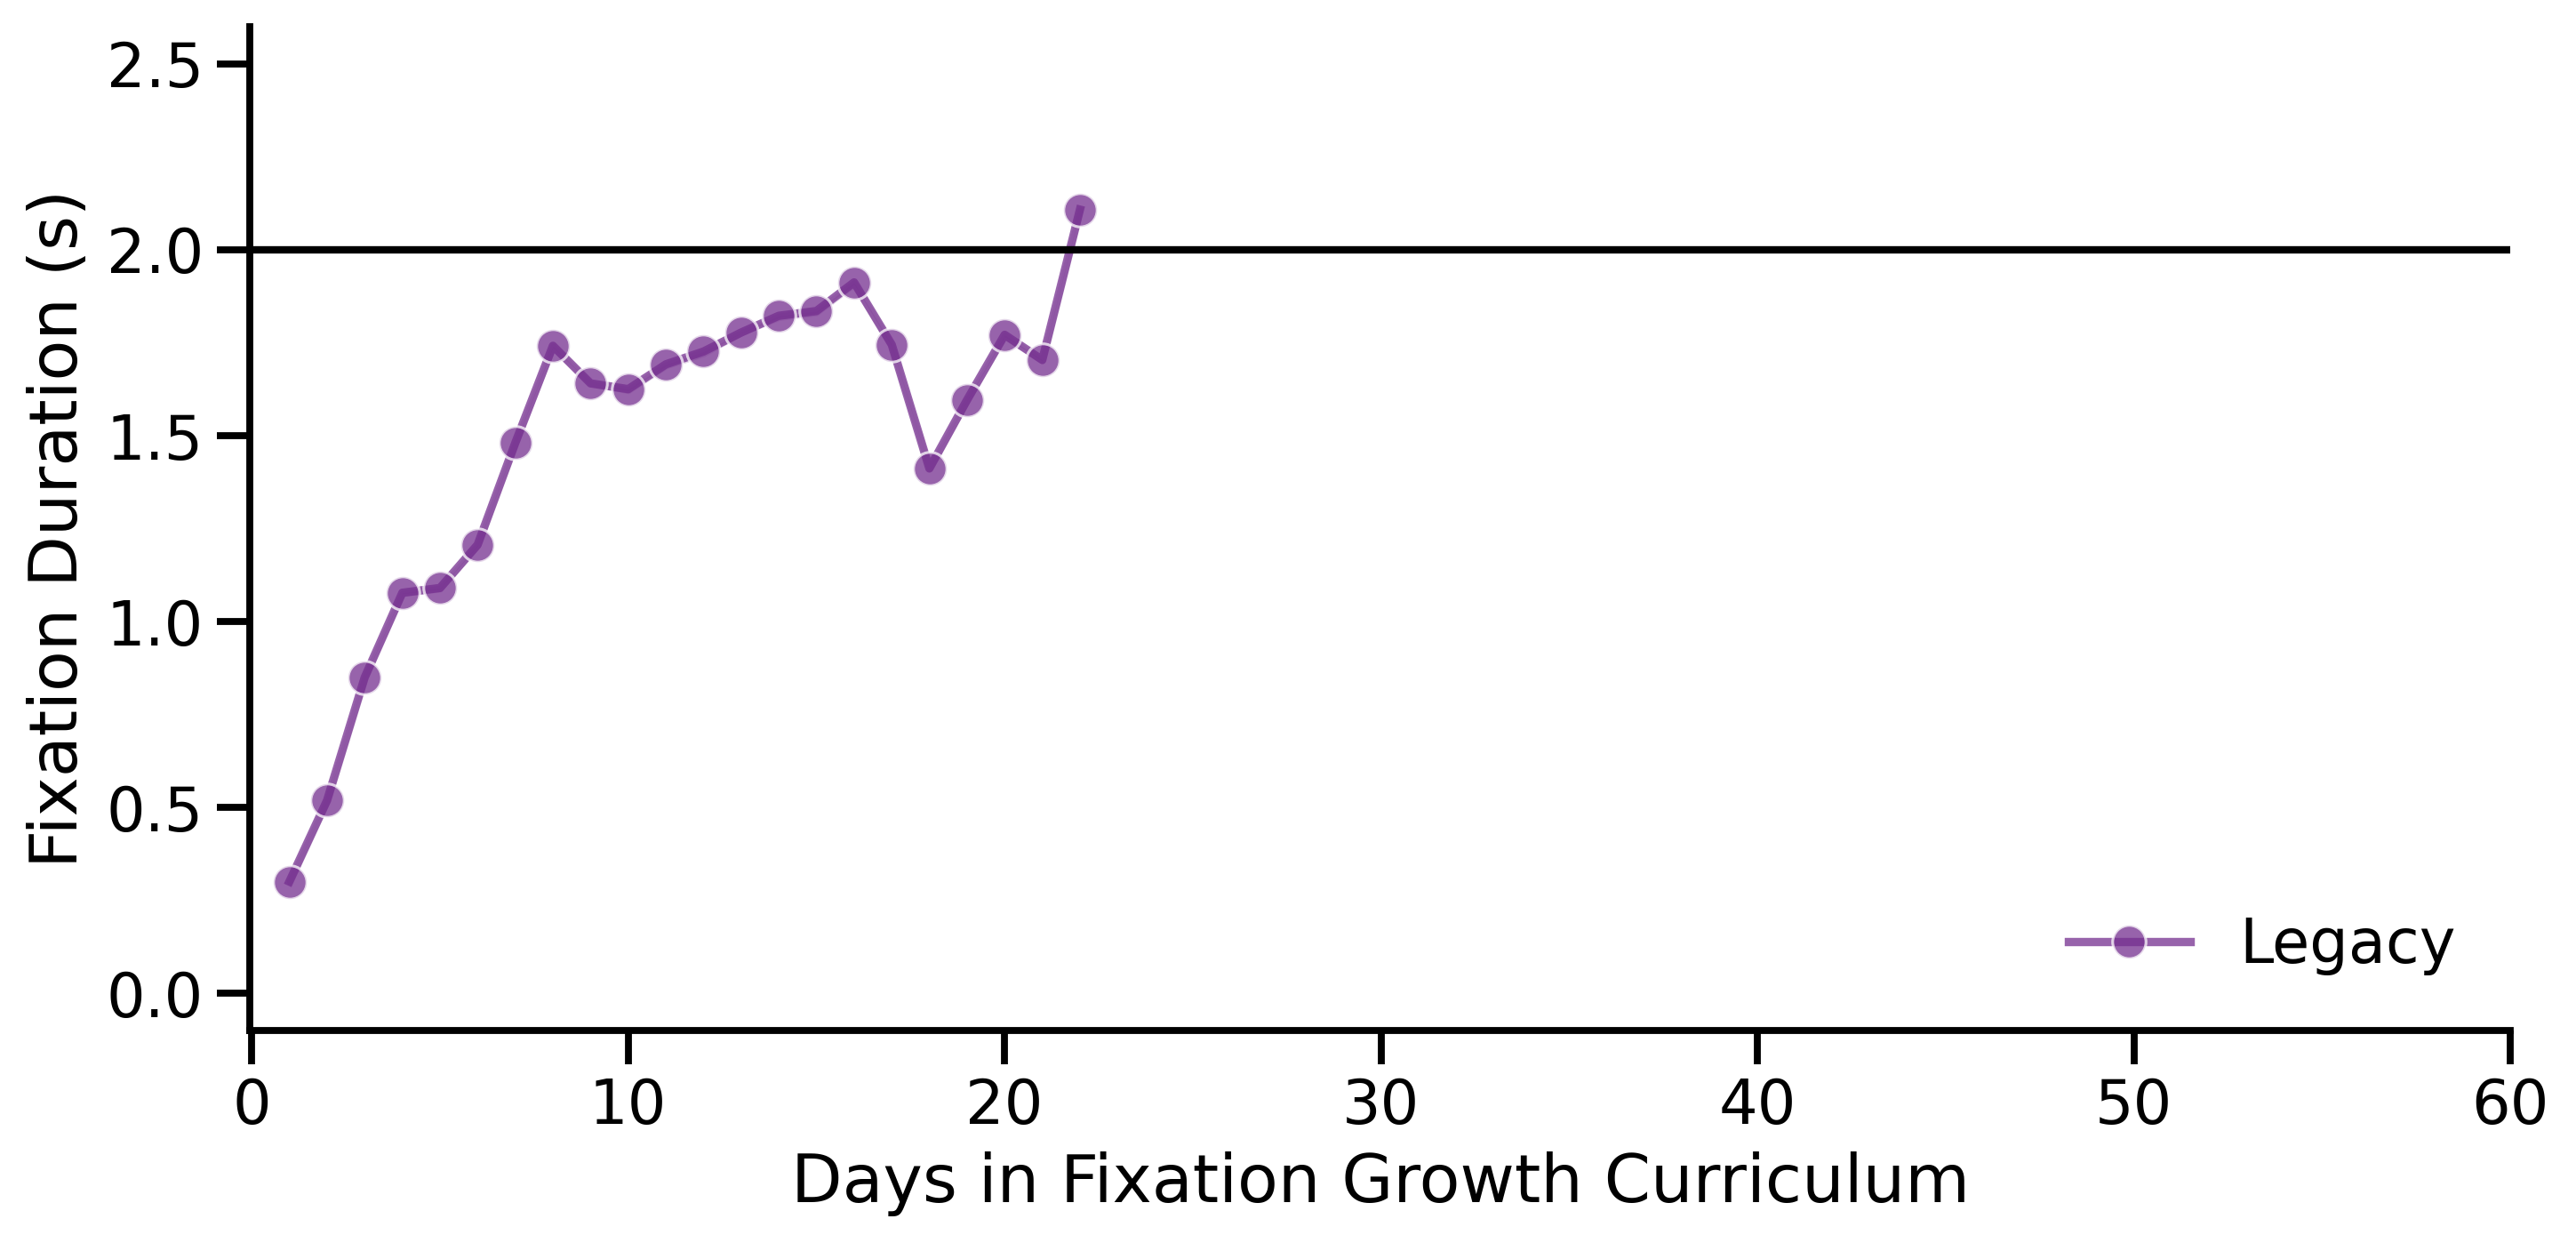

In [42]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
plot_df = tdf.query("stage in @c.GROWING_STAGES and animal_id == @example_animal")

sns.lineplot(
    data=plot_df,
    x="days_relative_to_stage_5_adj",
    y="fixation_dur",
    estimator="max",
    ax=ax,
    hue="fix_experiment",
    hue_order=c.HUE_ORDER_EXP,
    palette=c.EXP_PALETTE,
    style="animal_id",
    marker="o",
    alpha=0.75
)
# ax.grid()
ax.axhline(2, color="k", lw=2)
_ = ax.set(ylabel="Fixation Duration (s)", xlabel="Days in Fixation Growth Curriculum", xlim=xlim, ylim=ylim)

sns.despine()

# Remove the default legend with style information
ax.get_legend().remove()
# Add a new legend with only the hue information
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:2], labels=legend_labels[1:2], loc="lower right", frameon=False)
plt.tight_layout()

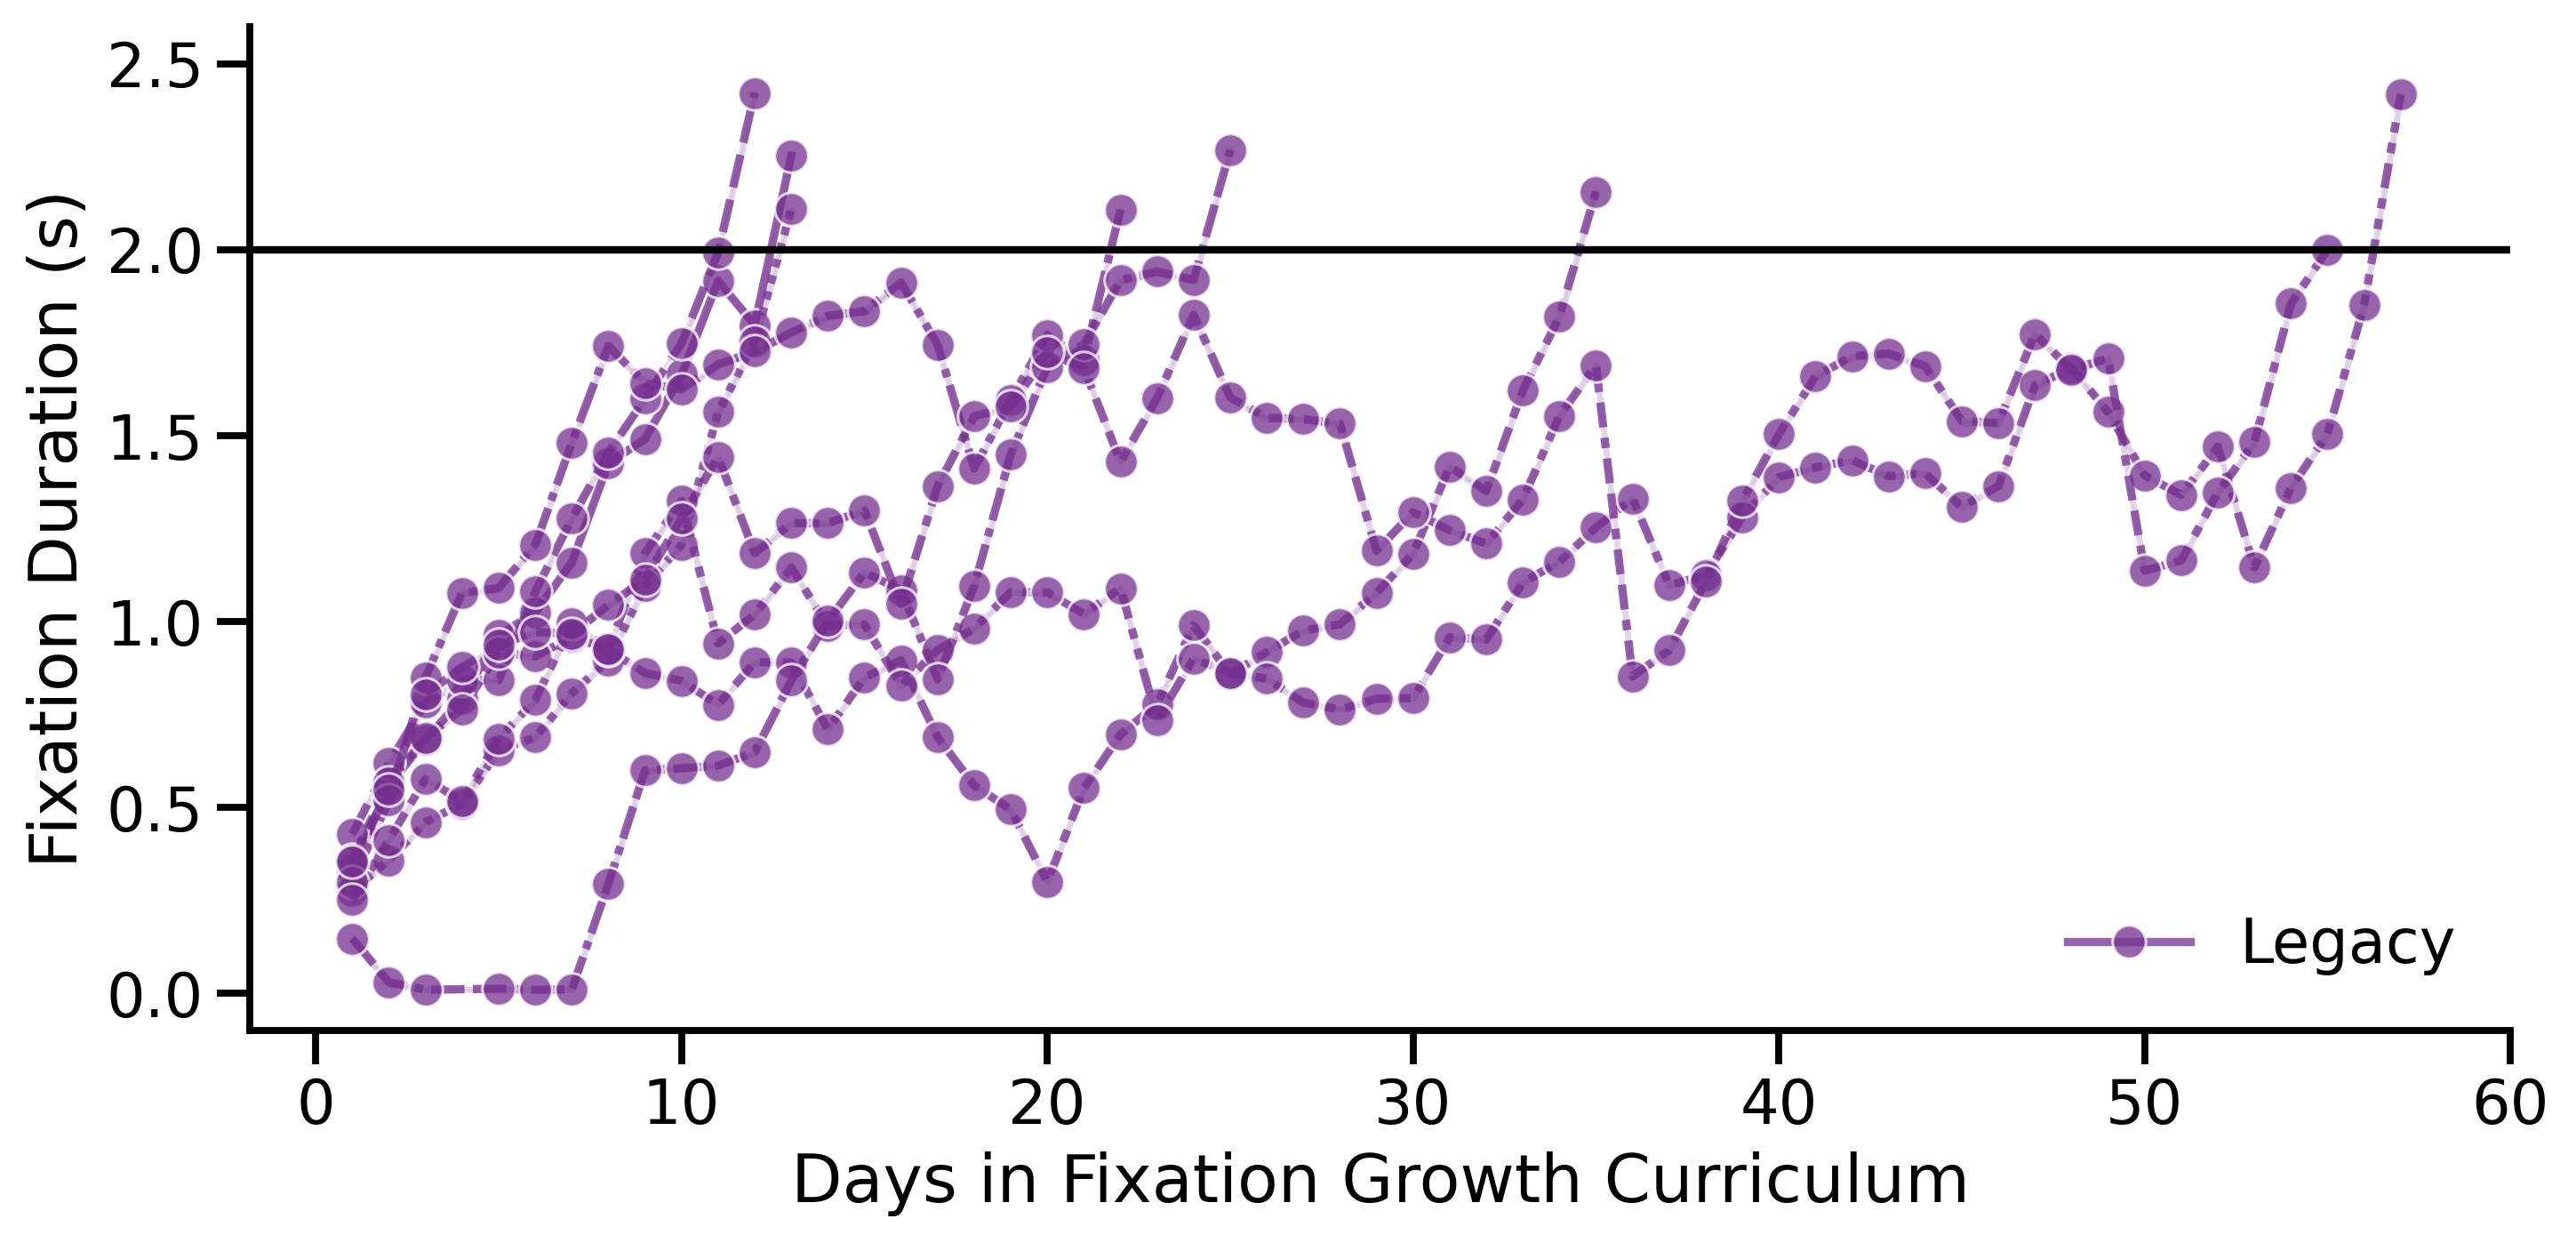

In [58]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
plot_df = tdf.query("stage in @c.GROWING_STAGES and fix_experiment == 'V1' and animal_id !='R044'")

sns.lineplot(
    data=plot_df,
    x="days_relative_to_stage_5_adj",
    y="fixation_dur",
    estimator="max",
    ax=ax,
    hue="fix_experiment",
    hue_order=c.HUE_ORDER_EXP,
    palette=c.EXP_PALETTE,
    style="animal_id",
    marker="o",
    alpha=0.75
)
# ax.grid()
ax.axhline(2, color="k", lw=2)
_ = ax.set(ylabel="Fixation Duration (s)", xlabel="Days in Fixation Growth Curriculum", xlim=xlim, ylim=ylim)

sns.despine()

# Remove the default legend with style information
ax.get_legend().remove()
# Add a new legend with only the hue information
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:2], labels=legend_labels[1:2], loc="lower right", frameon=False)
plt.tight_layout()

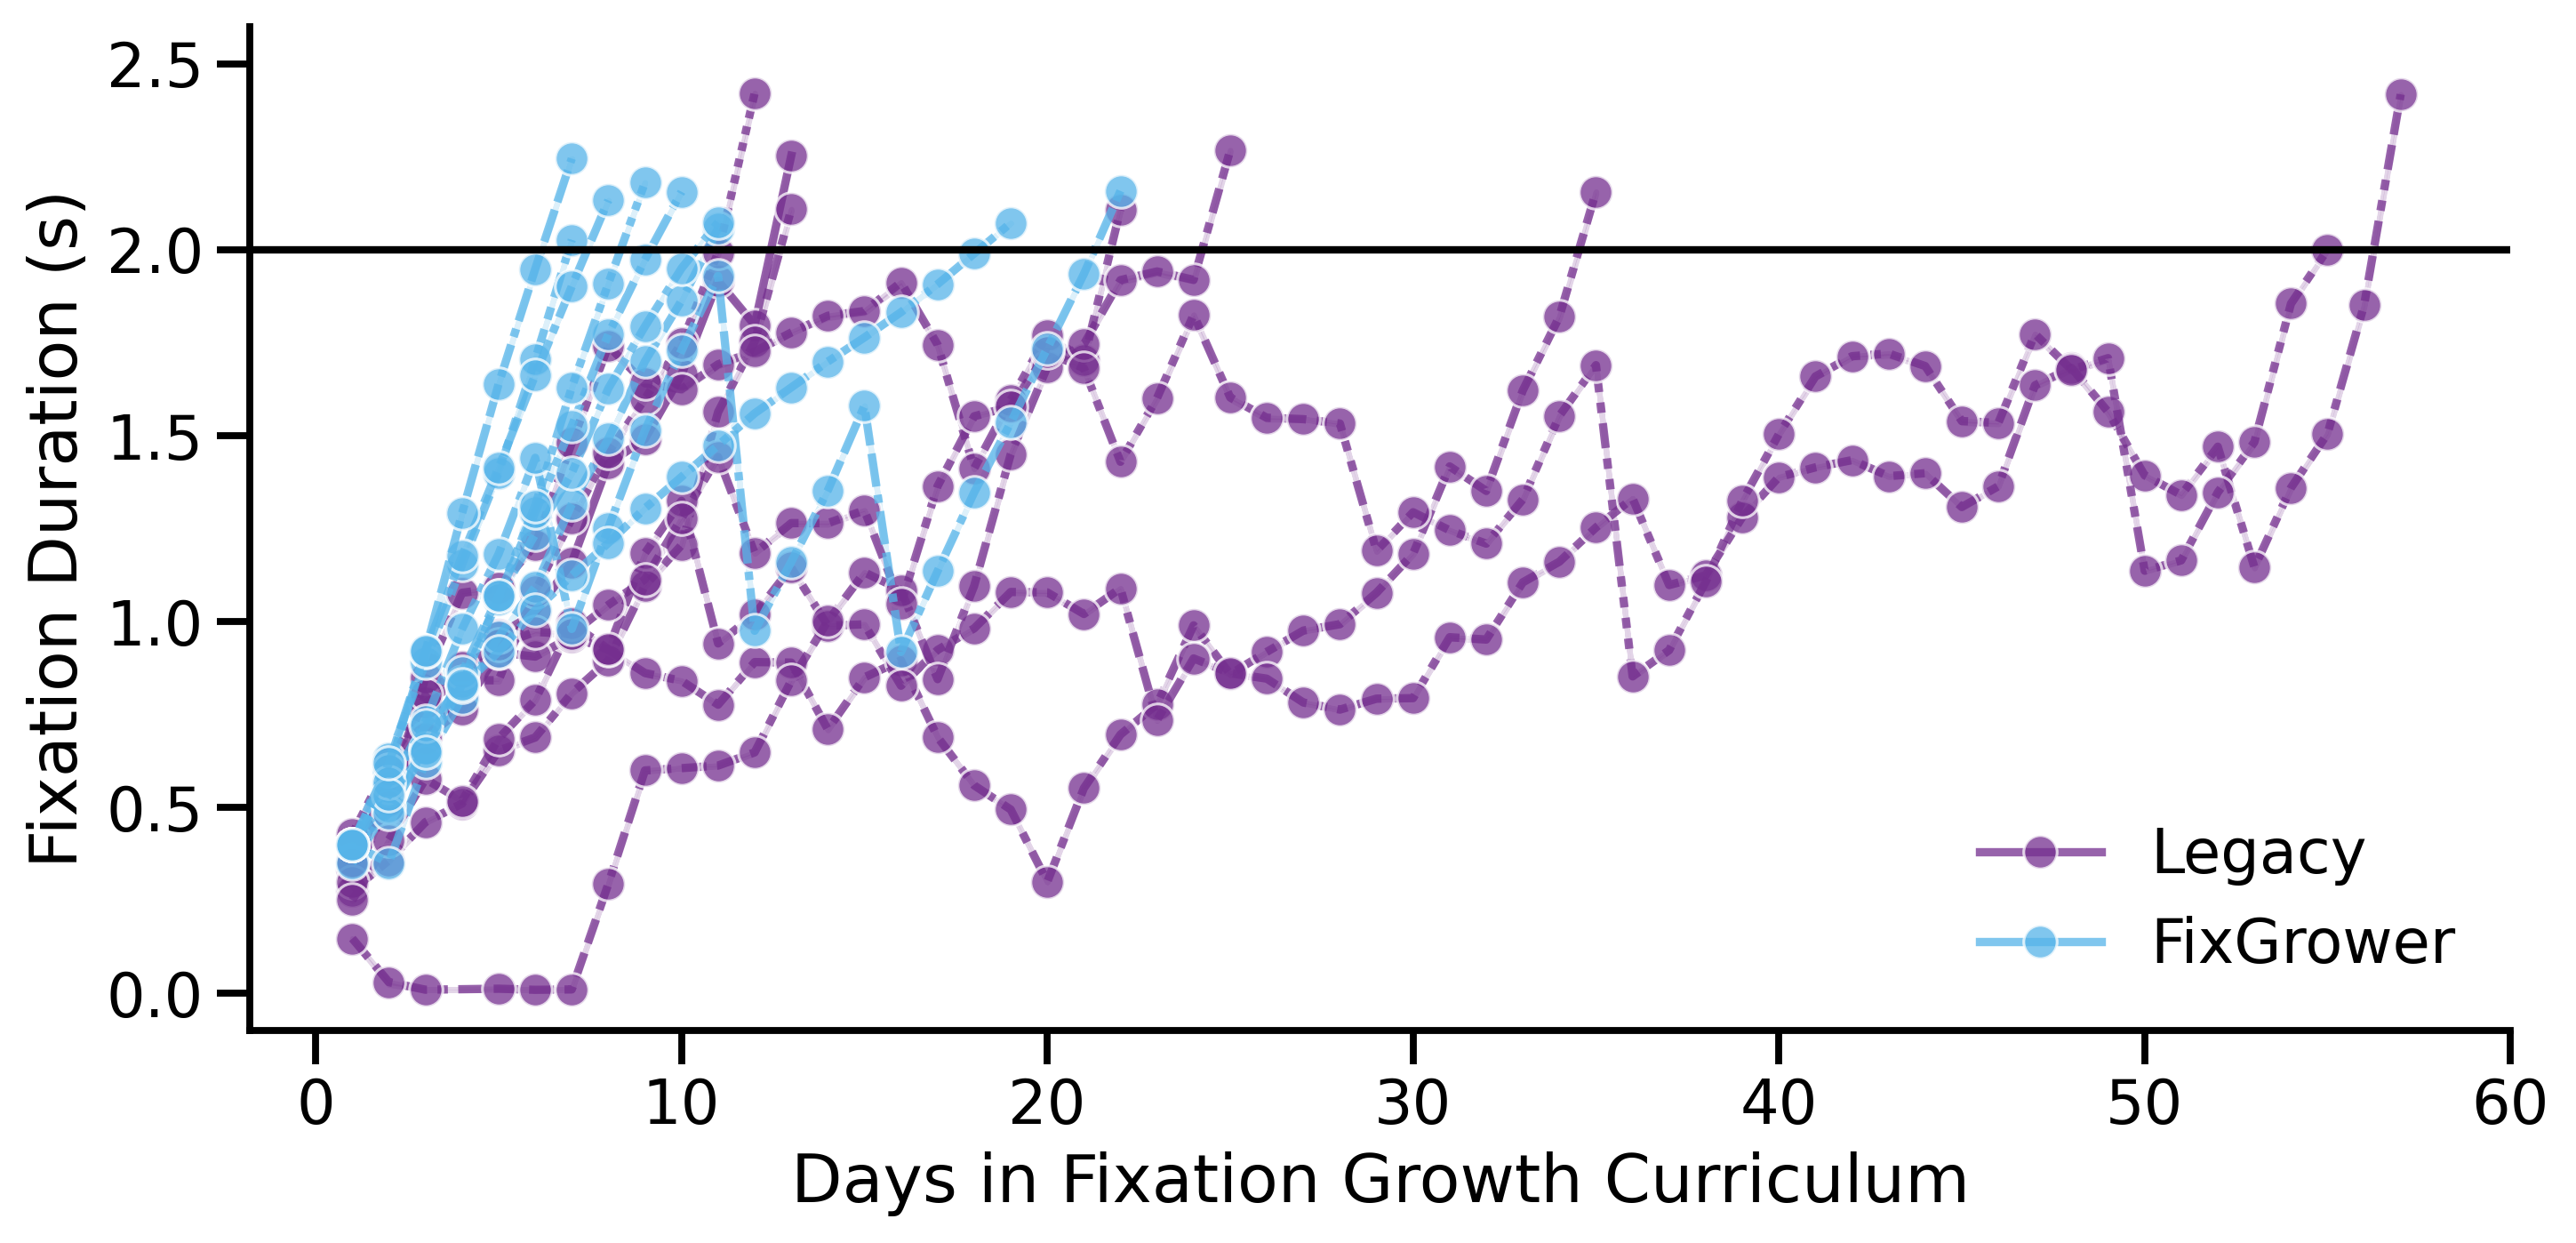

In [57]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
plot_df = tdf.query("stage in @c.GROWING_STAGES and animal_id != 'R044'")

sns.lineplot(
    data=plot_df,
    x="days_relative_to_stage_5_adj",
    y="fixation_dur",
    estimator="max",
    ax=ax,
    hue="fix_experiment",
    hue_order=c.HUE_ORDER_EXP,
    palette=c.EXP_PALETTE,
    style="animal_id",
    marker="o",
    alpha=0.75
)
# ax.grid()
ax.axhline(2, color="k", lw=2)
_ = ax.set(ylabel="Fixation Duration (s)", xlabel="Days in Fixation Growth Curriculum", xlim=xlim, ylim=ylim)

sns.despine()

# Remove the default legend with style information
ax.get_legend().remove()
# Add a new legend with only the hue information
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:3], labels=legend_labels[1:3], loc="lower right", frameon=False)
plt.tight_layout()

### Summary


In [45]:
plot_df = (
    tdf.query("has_reached_target_fixation == True")
    .groupby(["animal_id", "fix_experiment"], observed=True)[
        f"days_relative_to_stage_5"
    ]
    .min()
    .reset_index()
)

plot_df.rename(
    columns={f"days_relative_to_stage_5": "days_to_target"},
    inplace=True,
)

stats = plot_df.groupby('fix_experiment')['days_to_target'].agg(['median', 'mean', 'std', 'size'])
stats

,median,mean,std,size
fix_experiment,,,,
V1,23.5,29.000000,18.369229,8
V2,10.0,11.444444,5.456902,9


/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_58675/619666635.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Legacy", "FixGrower"])


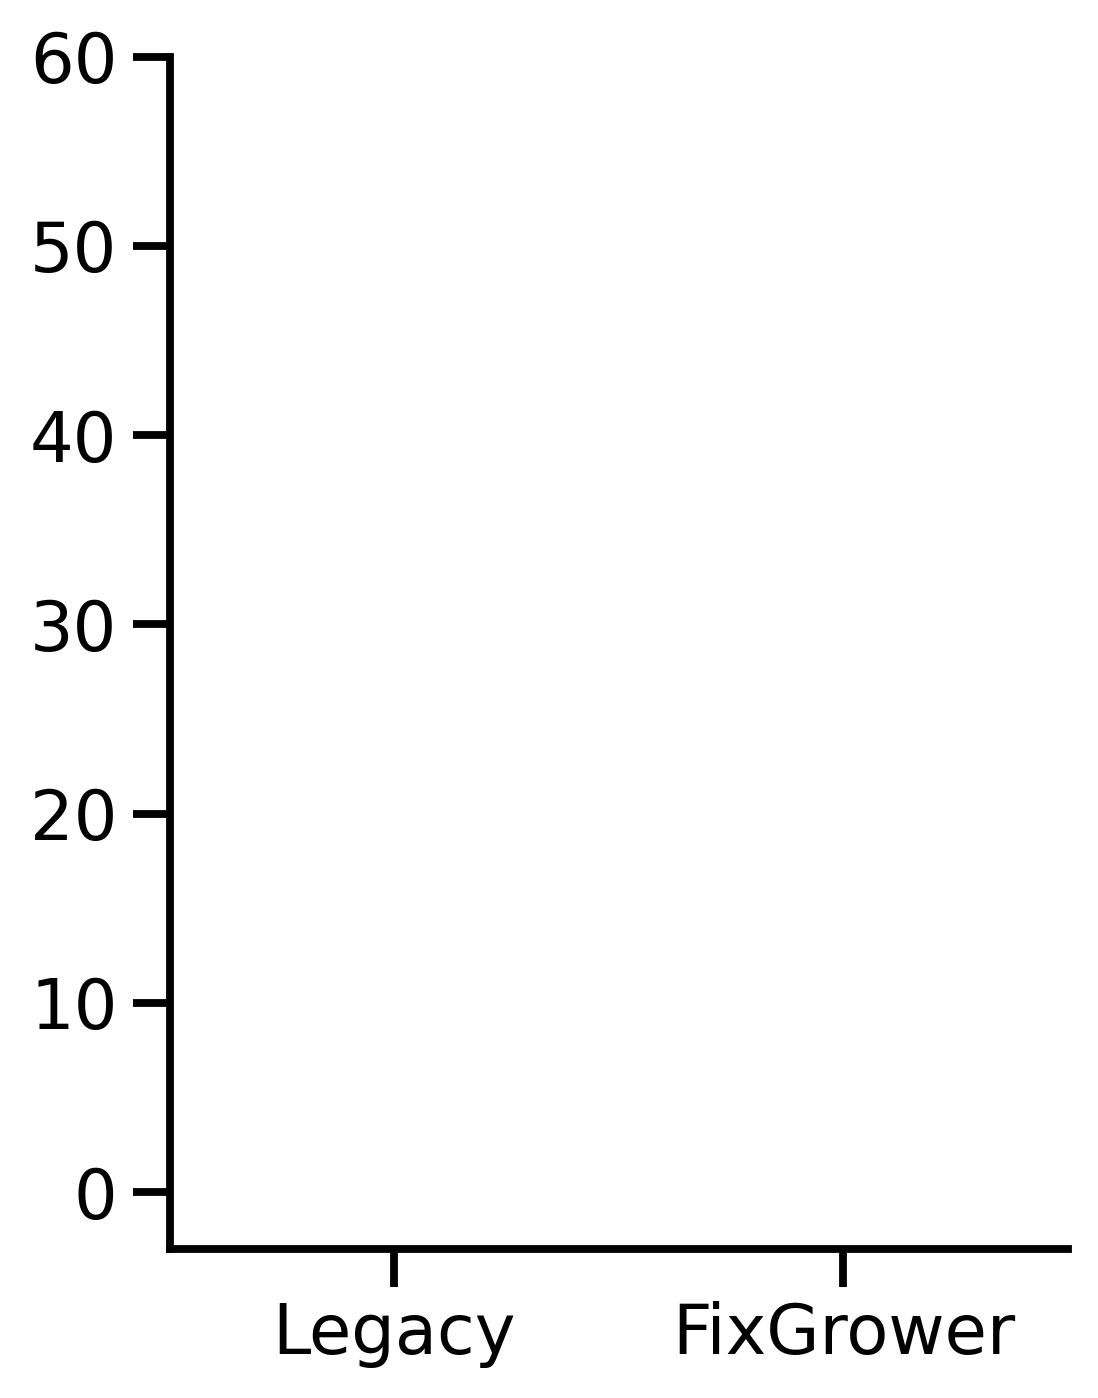

In [53]:
fig, ax = plt.subplots(figsize=(4,5), dpi=300)
sns.despine()

palette=["white", "white"]
sns.pointplot(
    plot_df, x="fix_experiment", order=c.HUE_ORDER_EXP, y="days_to_target", ax=ax, linestyle=None, errorbar="se", hue="fix_experiment", palette=palette
)

sns.stripplot(
    plot_df, x="fix_experiment", order=c.HUE_ORDER_EXP, y="days_to_target", ax=ax, hue="fix_experiment", palette=palette, alpha=0.5, jitter=False, s=7
)

ax.set_ylim(-3, 60)
ax.set(xlabel="", ylabel="")
ax.set_xticklabels(["Legacy", "FixGrower"])
plt.tight_layout()


/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_58675/1511084933.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Legacy", "FixGrower"])


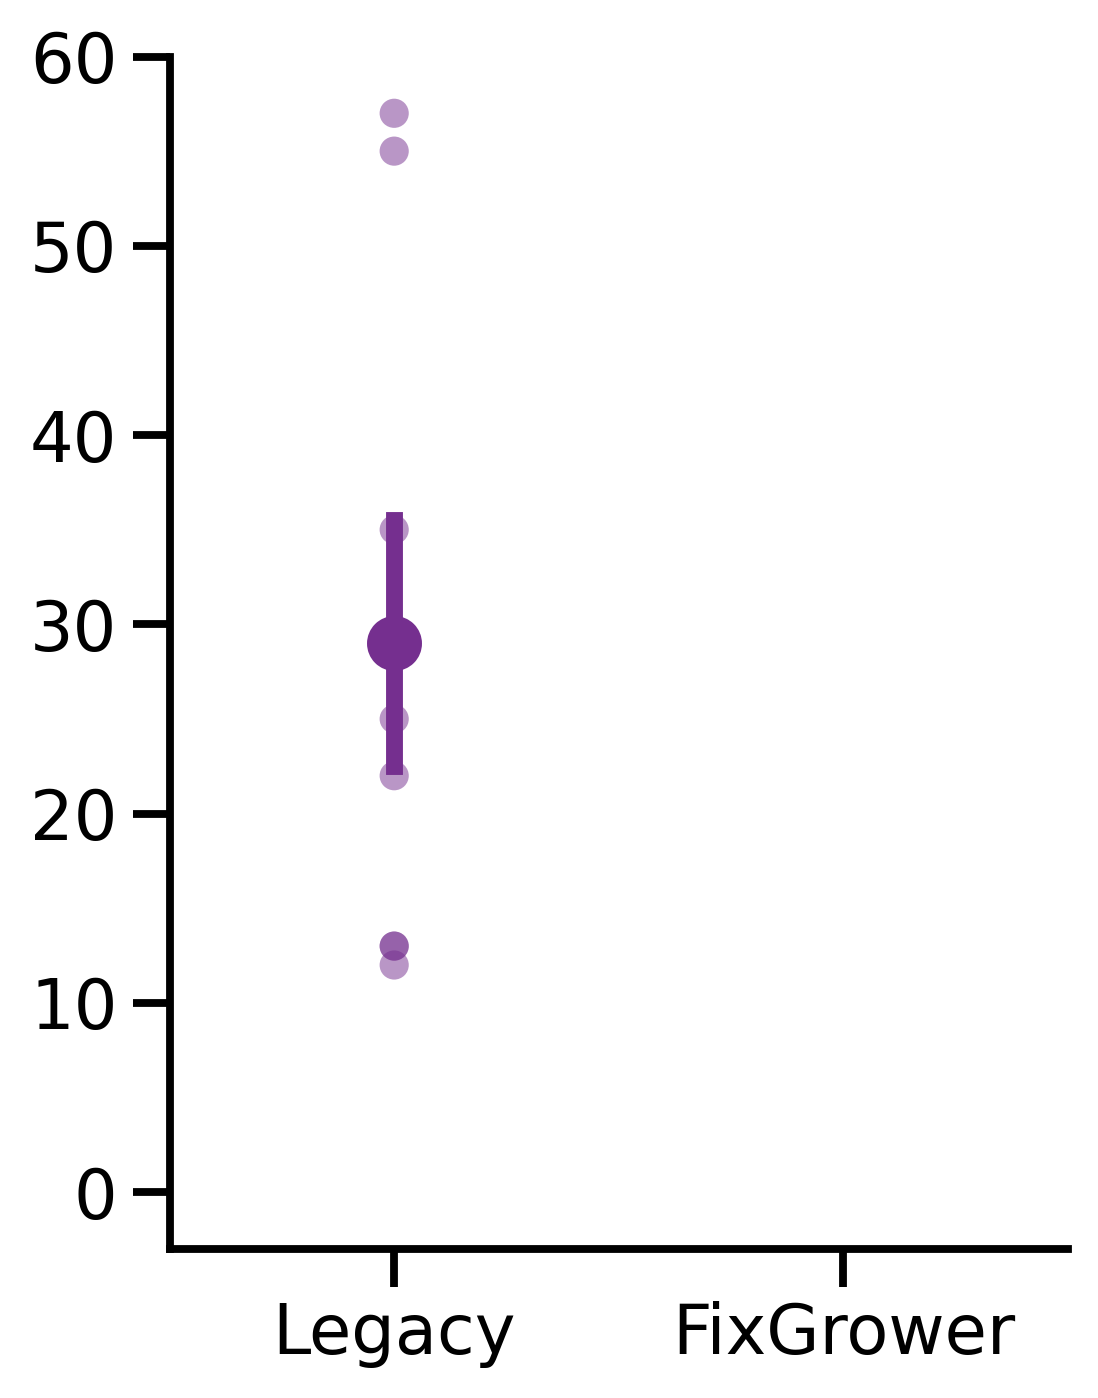

In [51]:
fig, ax = plt.subplots(figsize=(4,5), dpi=300)
sns.despine()

palette=[c.V1_COLOR, "white"]
sns.pointplot(
    plot_df, x="fix_experiment", order=c.HUE_ORDER_EXP, y="days_to_target", ax=ax, linestyle=None, errorbar="se", hue="fix_experiment", palette=palette
)

sns.stripplot(
    plot_df, x="fix_experiment", order=c.HUE_ORDER_EXP, y="days_to_target", ax=ax, hue="fix_experiment", palette=palette, alpha=0.5, jitter=False, s=7
)

ax.set_ylim(-3, 60)
ax.set(xlabel="", ylabel="")
ax.set_xticklabels(["Legacy", "FixGrower"])
plt.tight_layout()


/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_58675/230436574.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Legacy", "FixGrower"])


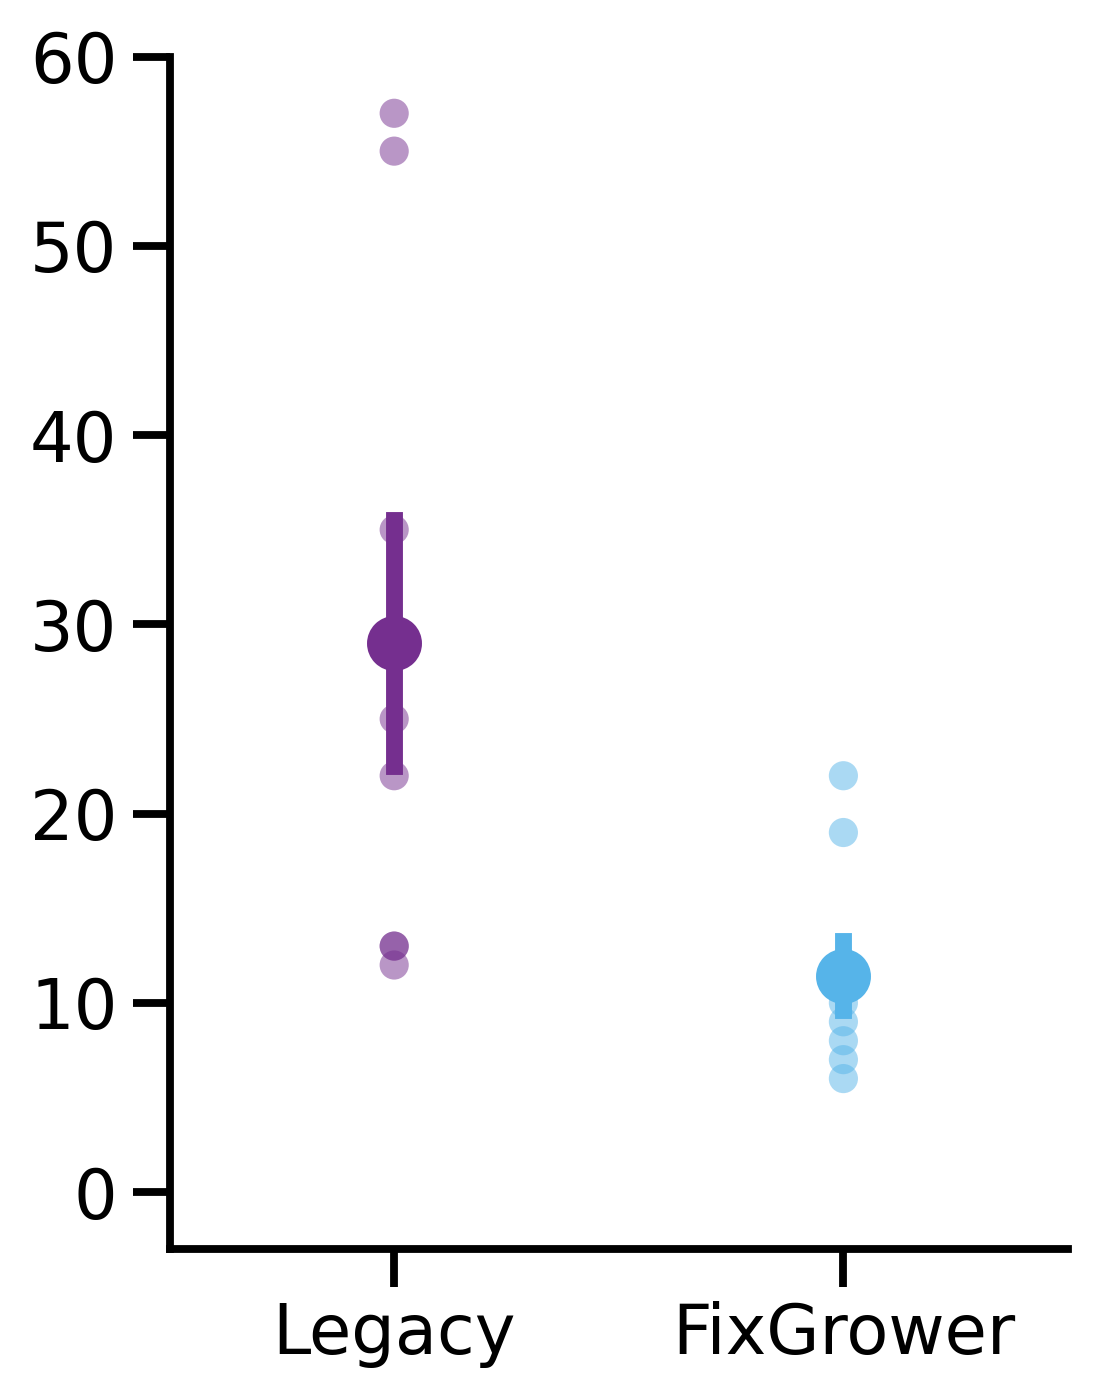

In [52]:
fig, ax = plt.subplots(figsize=(4,5), dpi=300)
sns.despine()
sns.pointplot(
    plot_df, x="fix_experiment", order=c.HUE_ORDER_EXP, y="days_to_target", ax=ax, linestyle=None, errorbar="se", hue="fix_experiment", palette=c.EXP_PALETTE
)

sns.stripplot(
    plot_df, x="fix_experiment", order=c.HUE_ORDER_EXP, y="days_to_target", ax=ax, hue="fix_experiment", palette=c.EXP_PALETTE, alpha=0.5, jitter=False, s=7
)

ax.set_ylim(-3, 60)
ax.set_xticklabels(["Legacy", "FixGrower"])
ax.set(xlabel="", ylabel="")
plt.tight_layout()


## Violation Rates


In [66]:
probe_violation_df = tdf.query("stage in @c.PROBE_STAGES").groupby(["date", "fix_experiment", "animal_id", "stage", "days_relative_to_stage_10"]).violations.mean().reset_index()
probe_violation_df.rename(columns={"violations": "violation_rate"}, inplace=True)

probe_violation_df["violation_rate"] = probe_violation_df["violation_rate"] * 100
probe_violation_df["combined_stage"] = True

probe_violation_df.head()

,date,fix_experiment,animal_id,stage,days_relative_to_stage_10,violation_rate,combined_stage
0,2024-08-07,V2,R043,9.0,-5.0,14.673913,True
1,2024-08-08,V2,R043,9.0,-4.0,10.501193,True
2,2024-08-09,V2,R043,9.0,-3.0,8.184143,True
3,2024-08-10,V2,R043,9.0,-2.0,4.514673,True
4,2024-08-11,V1,R042,9.0,-5.0,19.444444,True


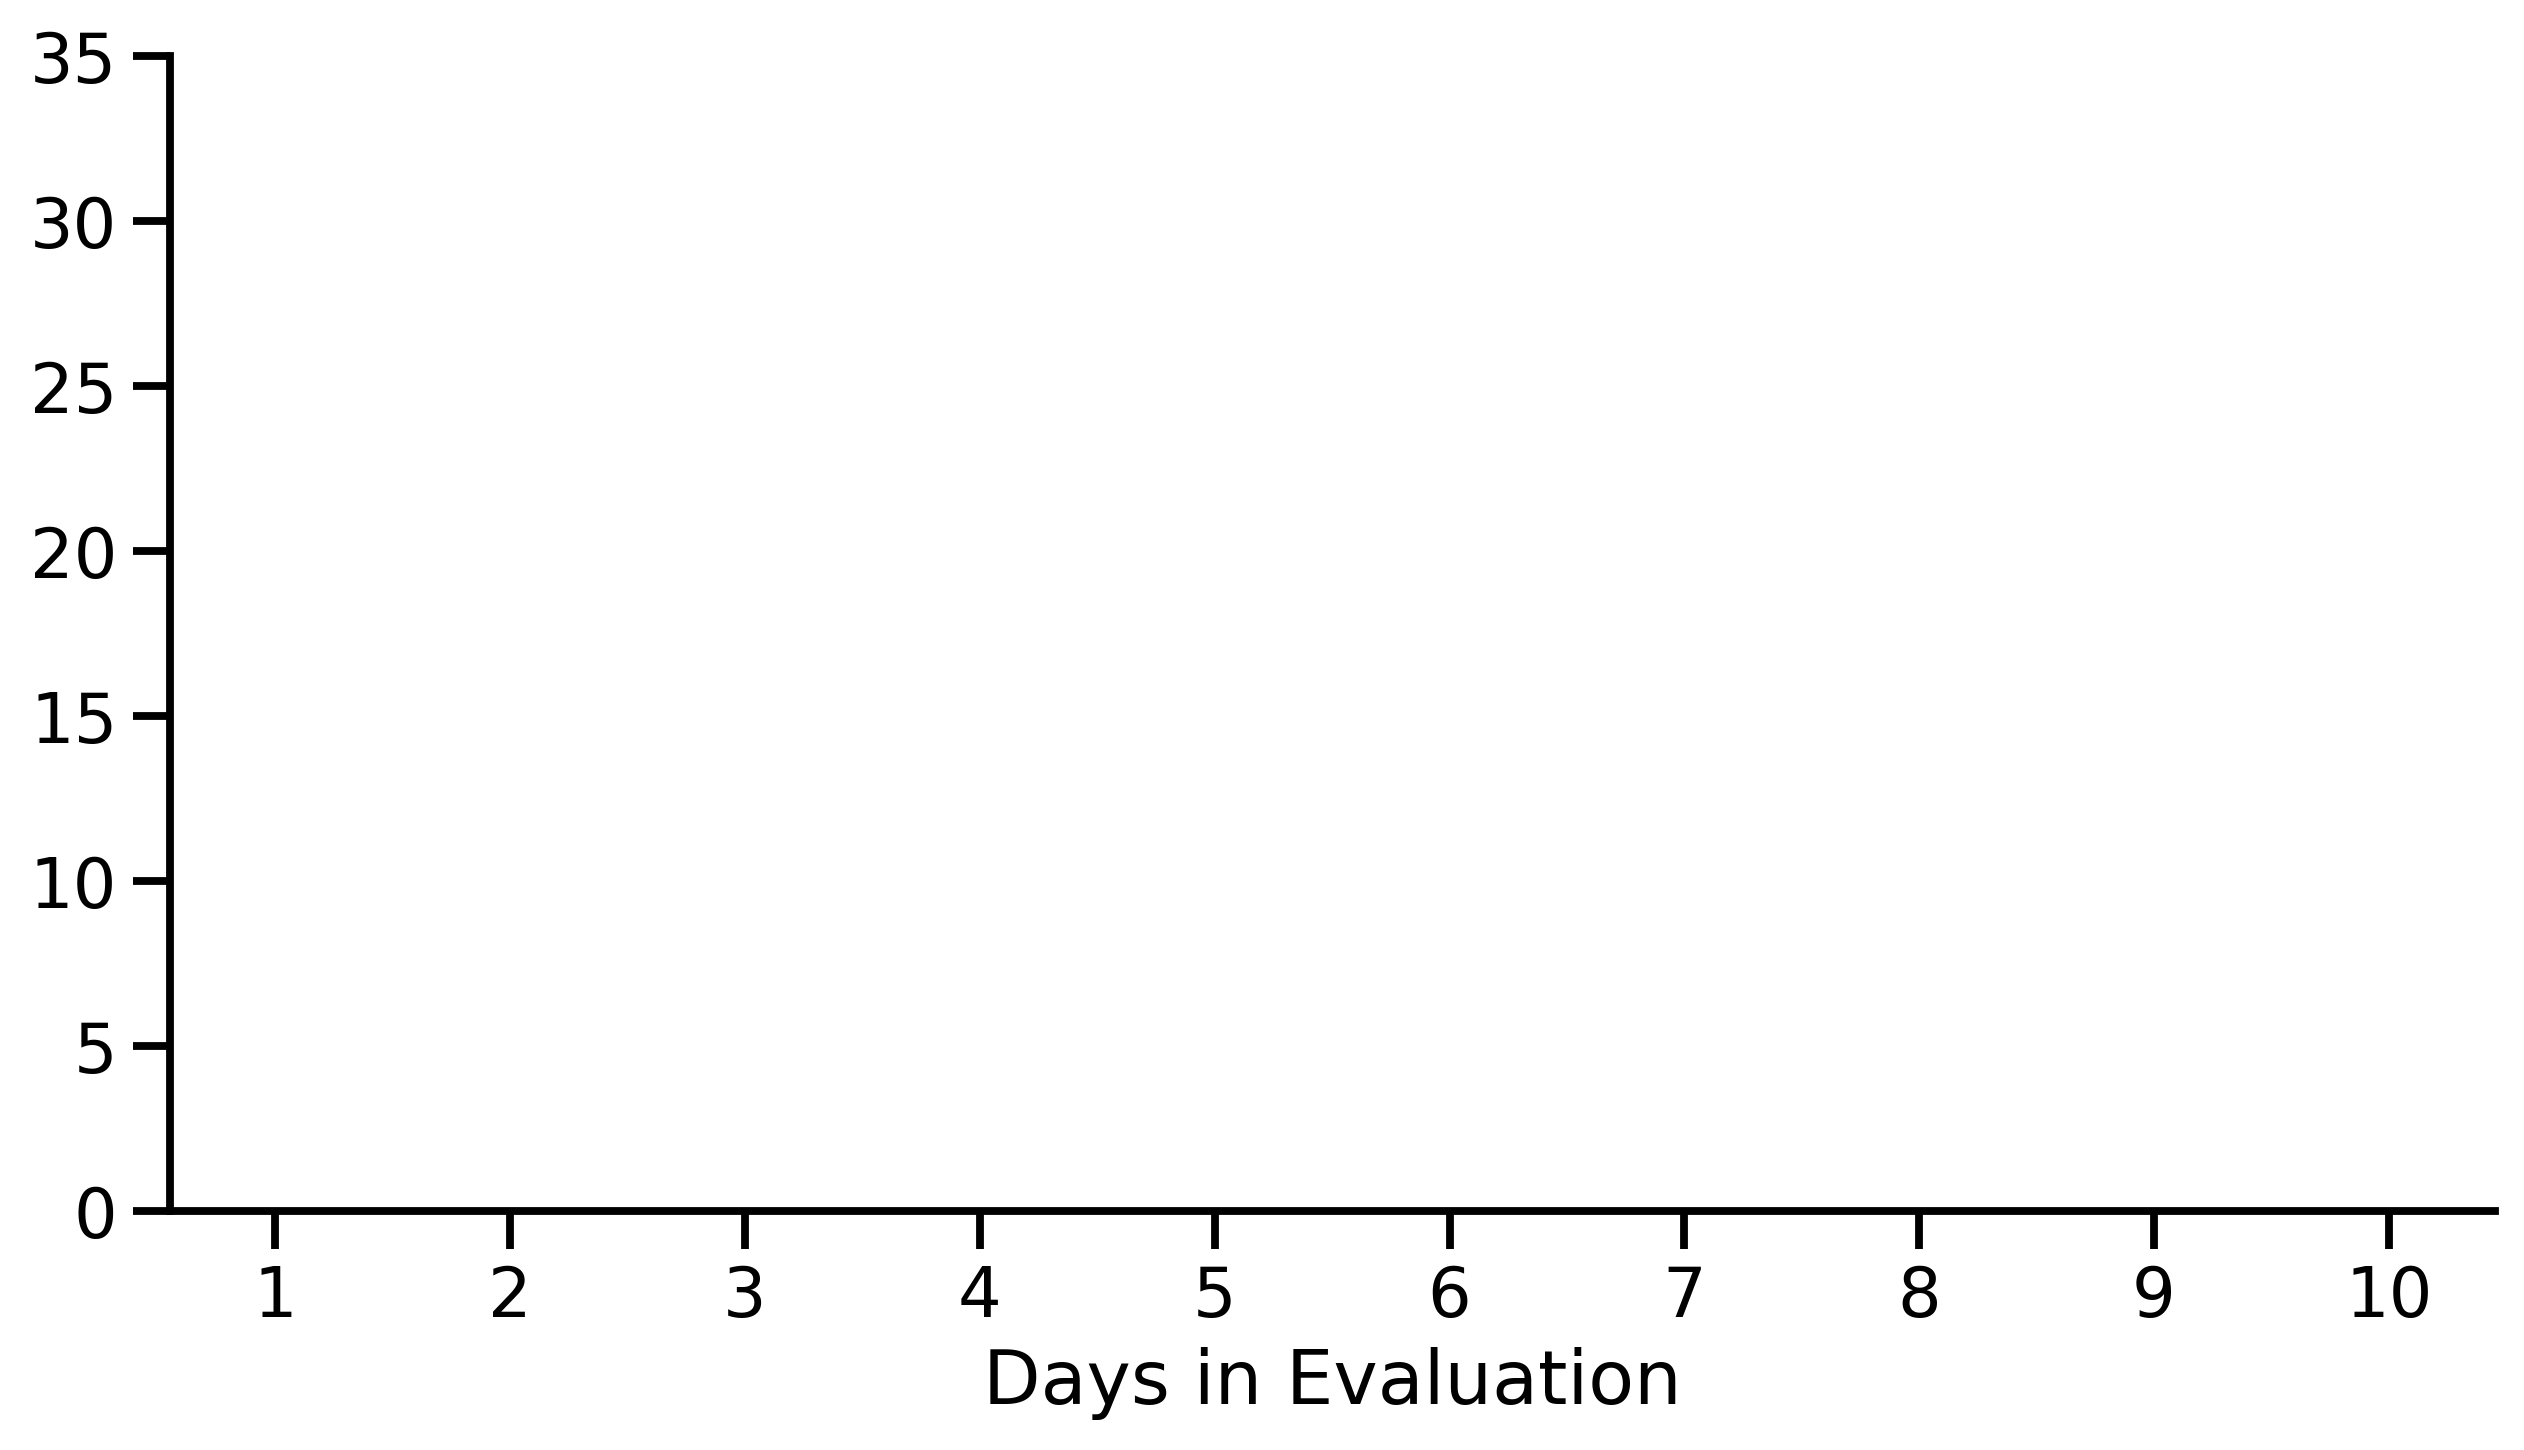

In [95]:
fig, ax = plt.subplots(figsize=(10,5), dpi = 300)

sns.despine()

palette = ["white", "white"]

sns.lineplot(data=probe_violation_df, x="days_relative_to_stage_10", y="violation_rate", hue="fix_experiment", hue_order=c.HUE_ORDER_EXP, palette=palette, marker="o", errorbar="se")
ax.set_ylim(0, 35)
ax.set_xticks(range(-5,5))  # Set xticks from 1 to 10
ax.set_xticklabels(range(1, 11))  # Set xtick labels from 1 to 10


_ = ax.set(xlabel="Days in Evaluation", ylabel="")

# Remove the default legend with style information
ax.get_legend().remove()




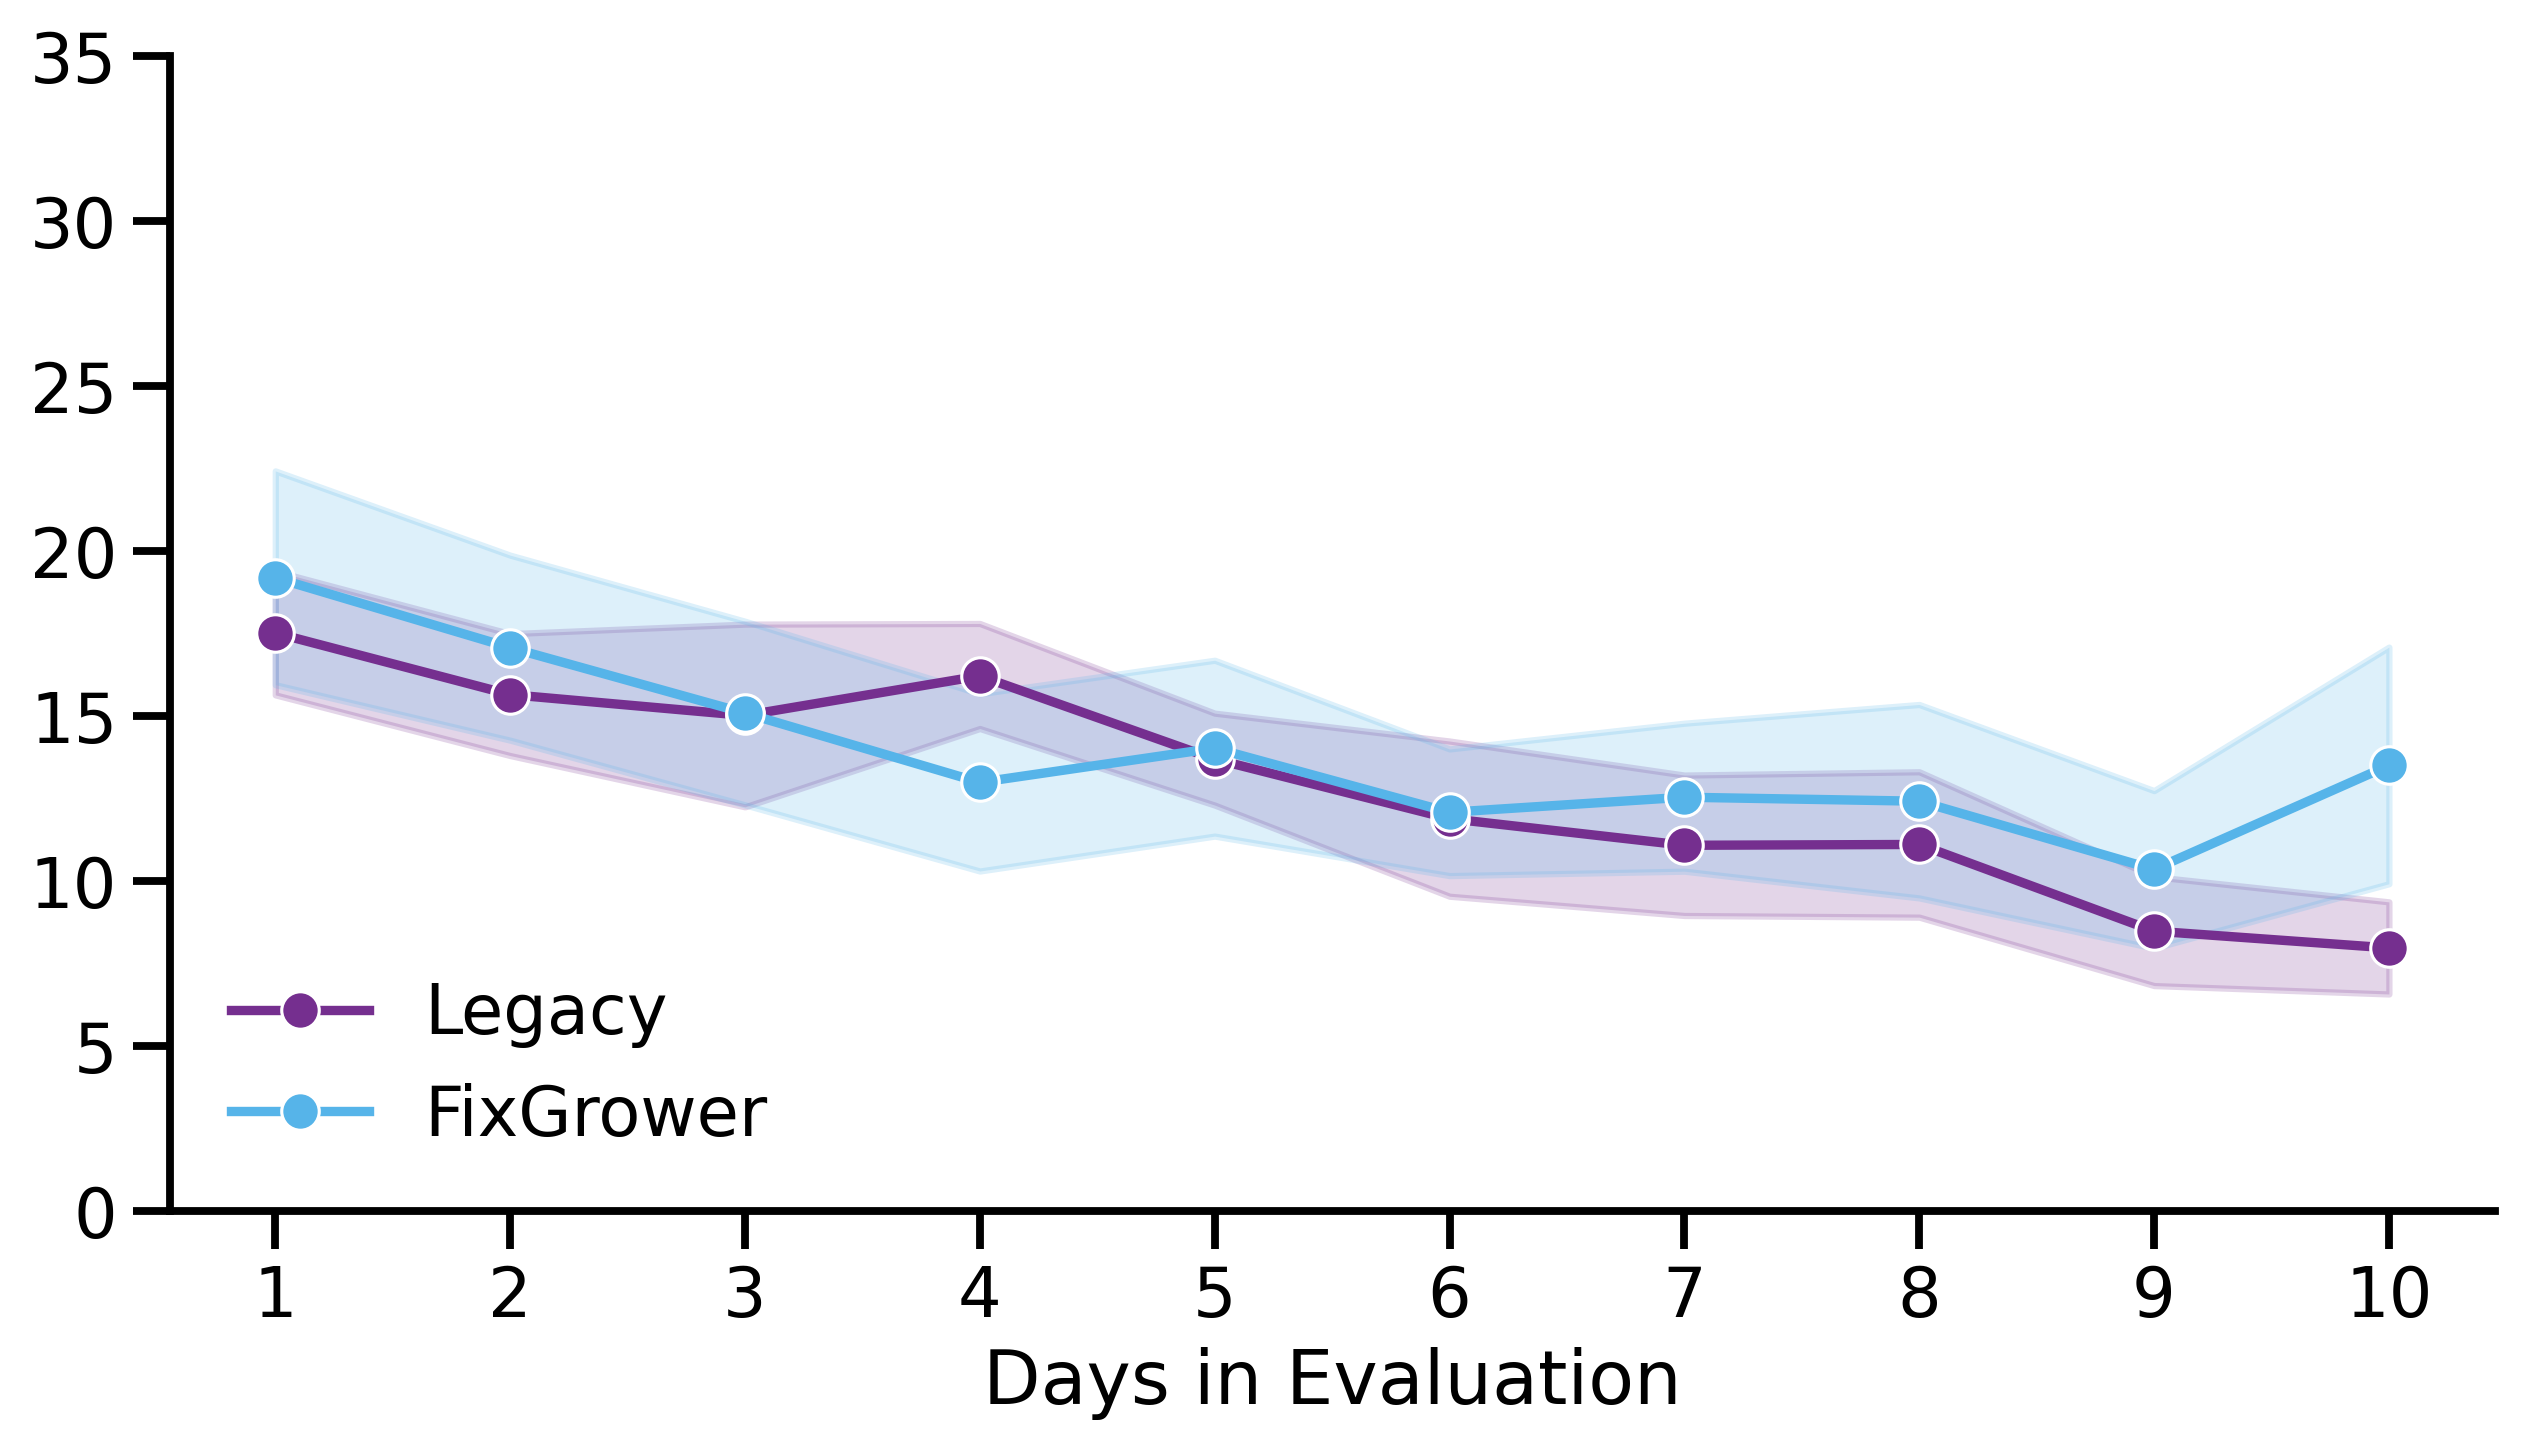

In [96]:
fig, ax = plt.subplots(figsize=(10,5), dpi = 300)

sns.despine()

sns.lineplot(data=probe_violation_df, x="days_relative_to_stage_10", y="violation_rate", hue="fix_experiment", hue_order=c.HUE_ORDER_EXP, palette=c.EXP_PALETTE, marker="o", errorbar="se")
ax.set_ylim(0, 35)
ax.set_xticks(range(-5,5))  # Set xticks from 1 to 10
ax.set_xticklabels(range(1, 11))  # Set xtick labels from 1 to 10


_ = ax.set(xlabel="Days in Evaluation", ylabel="")

# Remove the default legend with style information
ax.get_legend().remove()
# Add a new legend with only the hue information
legend_labels = ["Legacy", "FixGrower"]
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:3], labels=legend_labels, loc="lower left", frameon=False)




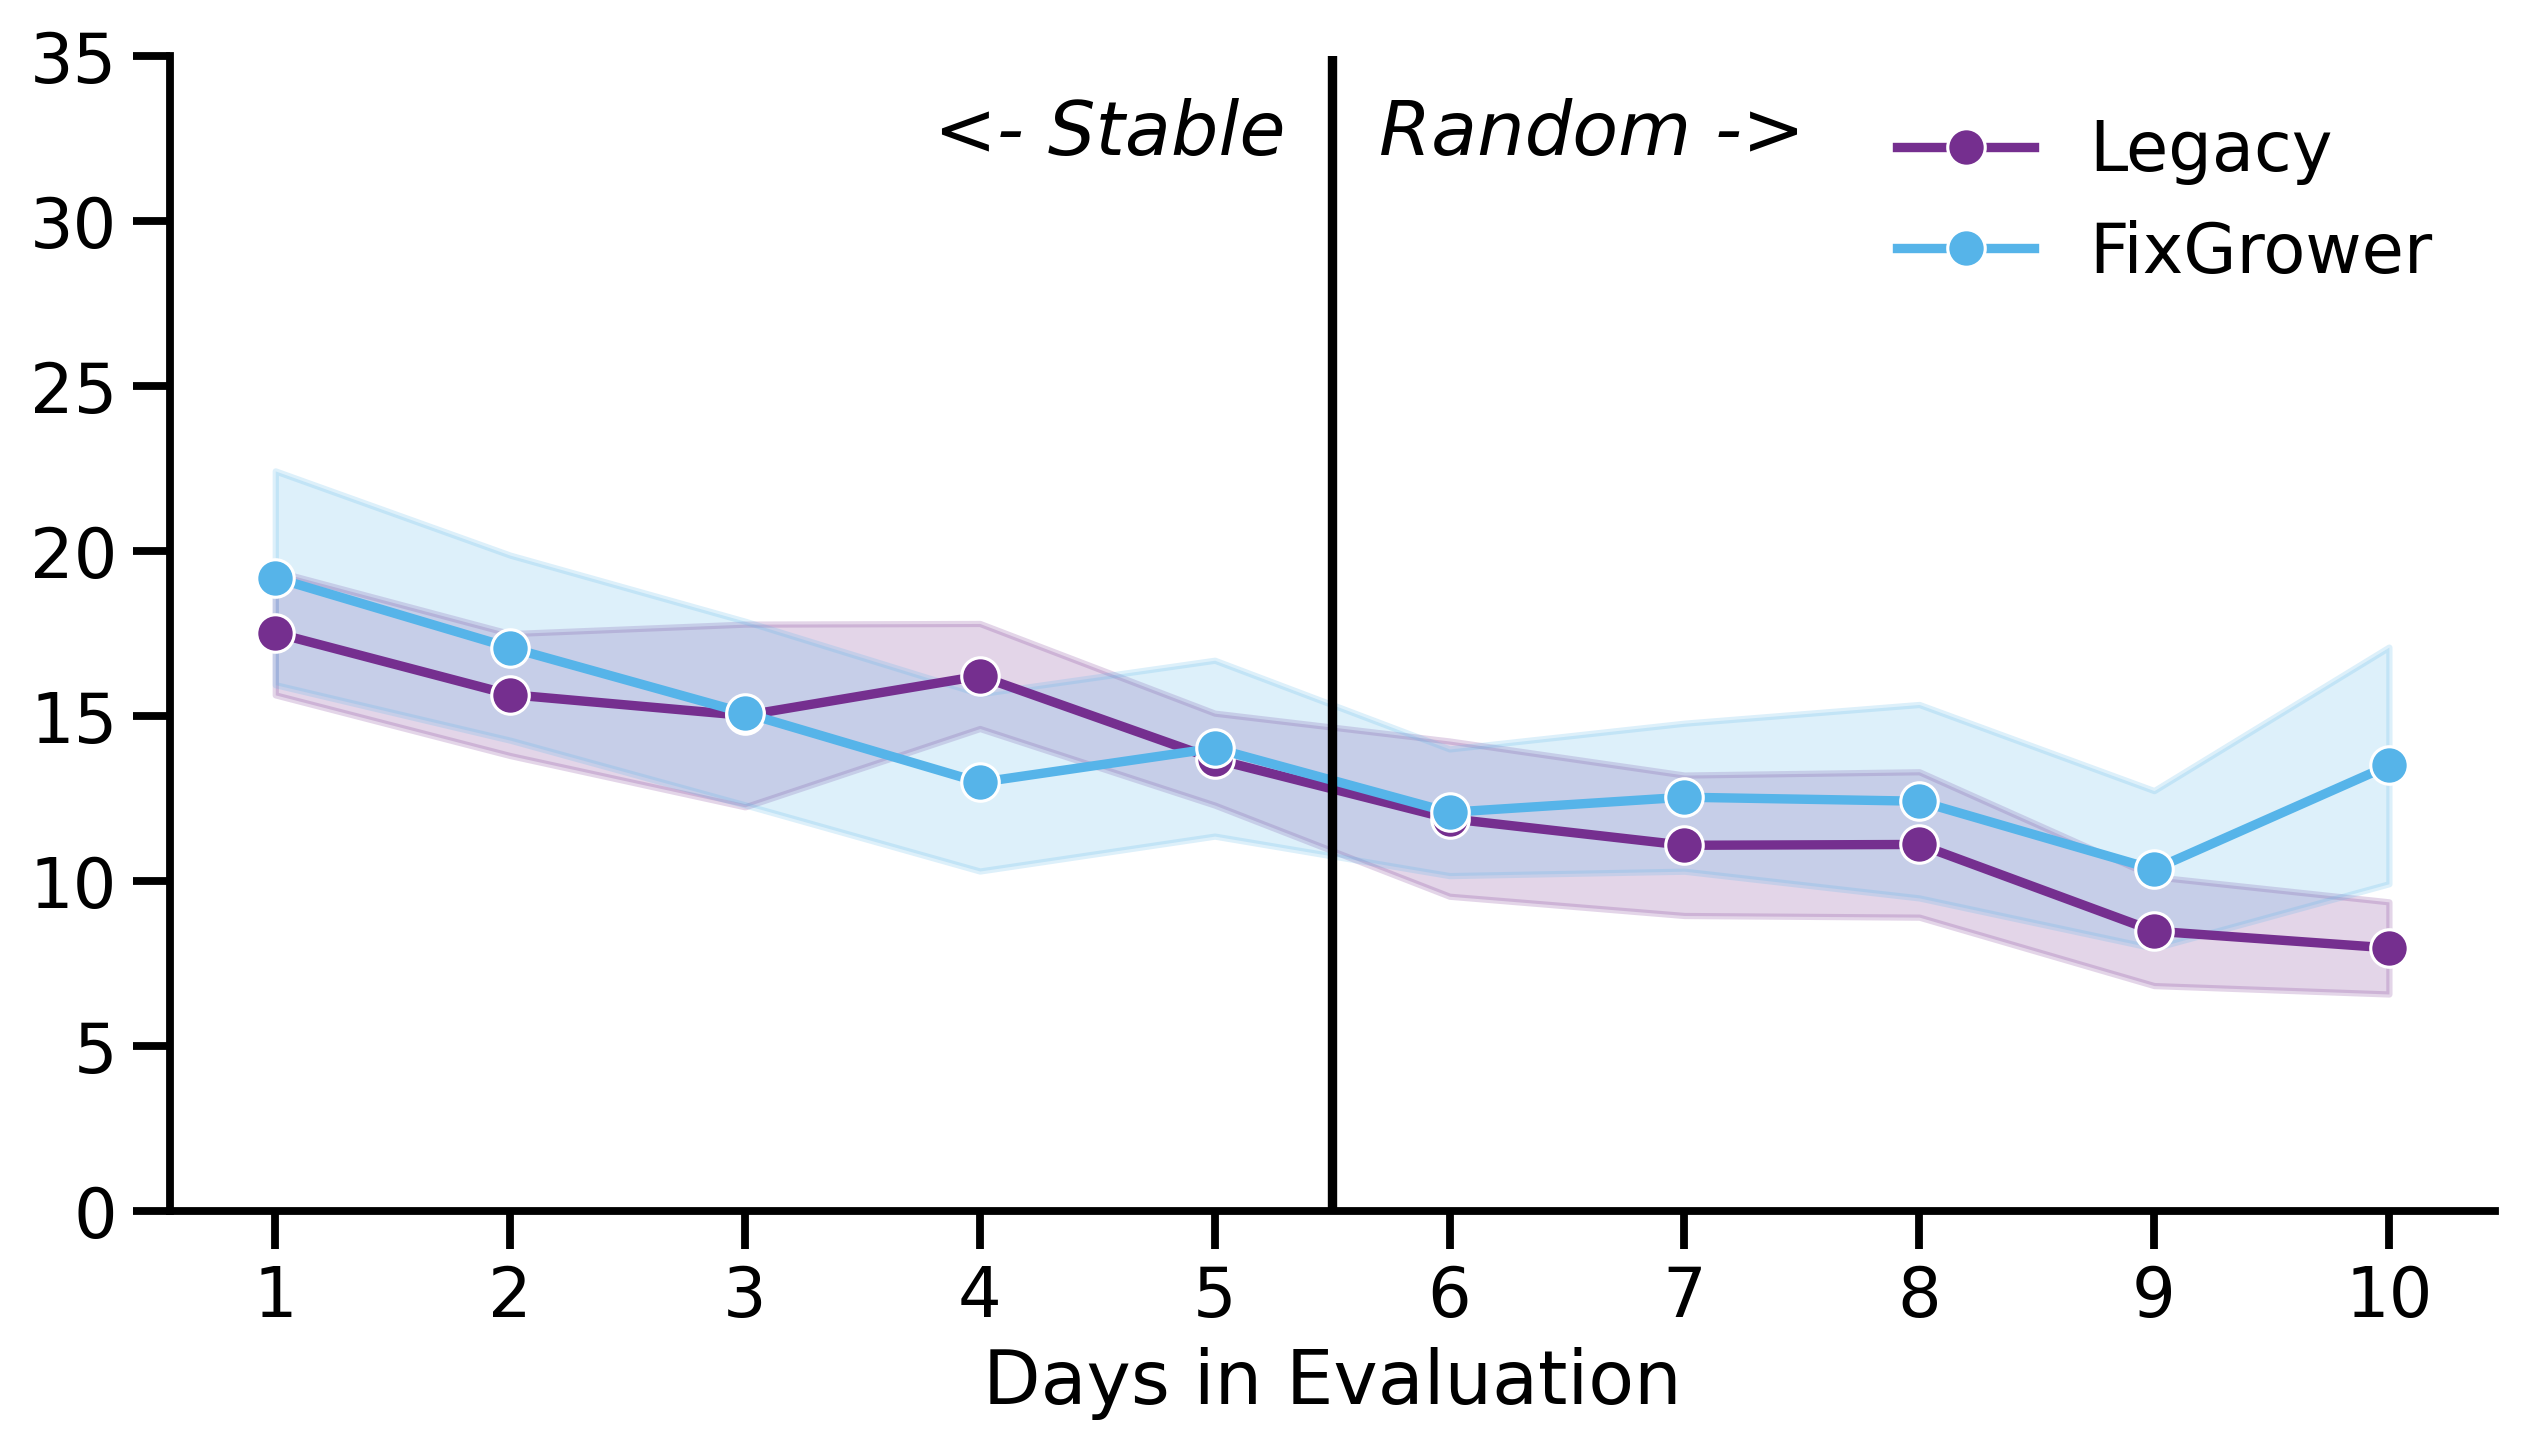

In [78]:
fig, ax = plt.subplots(figsize=(10,5), dpi = 300)

sns.despine()

sns.lineplot(data=probe_violation_df, x="days_relative_to_stage_10", y="violation_rate", hue="fix_experiment", hue_order=c.HUE_ORDER_EXP, palette=c.EXP_PALETTE, marker="o", errorbar="se")
ax.set_ylim(0, 35)
ax.set_xticks(range(-5,5))  # Set xticks from 1 to 10
ax.set_xticklabels(range(1, 11))  # Set xtick labels from 1 to 10
ax.axvline(-0.5, color="black")
_ = ax.text(-0.3, 32, "Random ->", horizontalalignment="left", fontstyle="italic")
_ = ax.text(-0.7, 32, "<- Stable", horizontalalignment="right", fontstyle="italic")

_ = ax.set(xlabel="Days in Evaluation", ylabel="")

# Remove the default legend with style information
ax.get_legend().remove()
# Add a new legend with only the hue information
legend_labels = ["Legacy", "FixGrower"]
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:3], labels=legend_labels, loc="upper right", frameon=False)




In [ ]:
fig, ax = plt.subplots(figsize=(4,5))

u.box_strip_v1_vs_v2(probe_violation_df, x="combined_stage", order=None, y="violation_rate", ax=ax, xlabel="", ylabel="", dodge=True, alpha=0.5, width=0.8)

ax.set_ylim(0, 50)
ax.set_xticklabels(["Combined\nStable & Random"])

# Remove y-axis spine, labels, and ticks
ax.yaxis.set_visible(False)
sns.despine(ax=ax, left=True)



In [80]:
probe_violation_df.head()

,date,fix_experiment,animal_id,stage,days_relative_to_stage_10,violation_rate,combined_stage
0,2024-08-07,V2,R043,9.0,-5.0,14.673913,True
1,2024-08-08,V2,R043,9.0,-4.0,10.501193,True
2,2024-08-09,V2,R043,9.0,-3.0,8.184143,True
3,2024-08-10,V2,R043,9.0,-2.0,4.514673,True
4,2024-08-11,V1,R042,9.0,-5.0,19.444444,True


/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_58675/2322488464.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Legacy", "FixGrower"])


[Text(0.5, 0, ''), Text(0, 0.5, ''), (0.0, 50.0)]

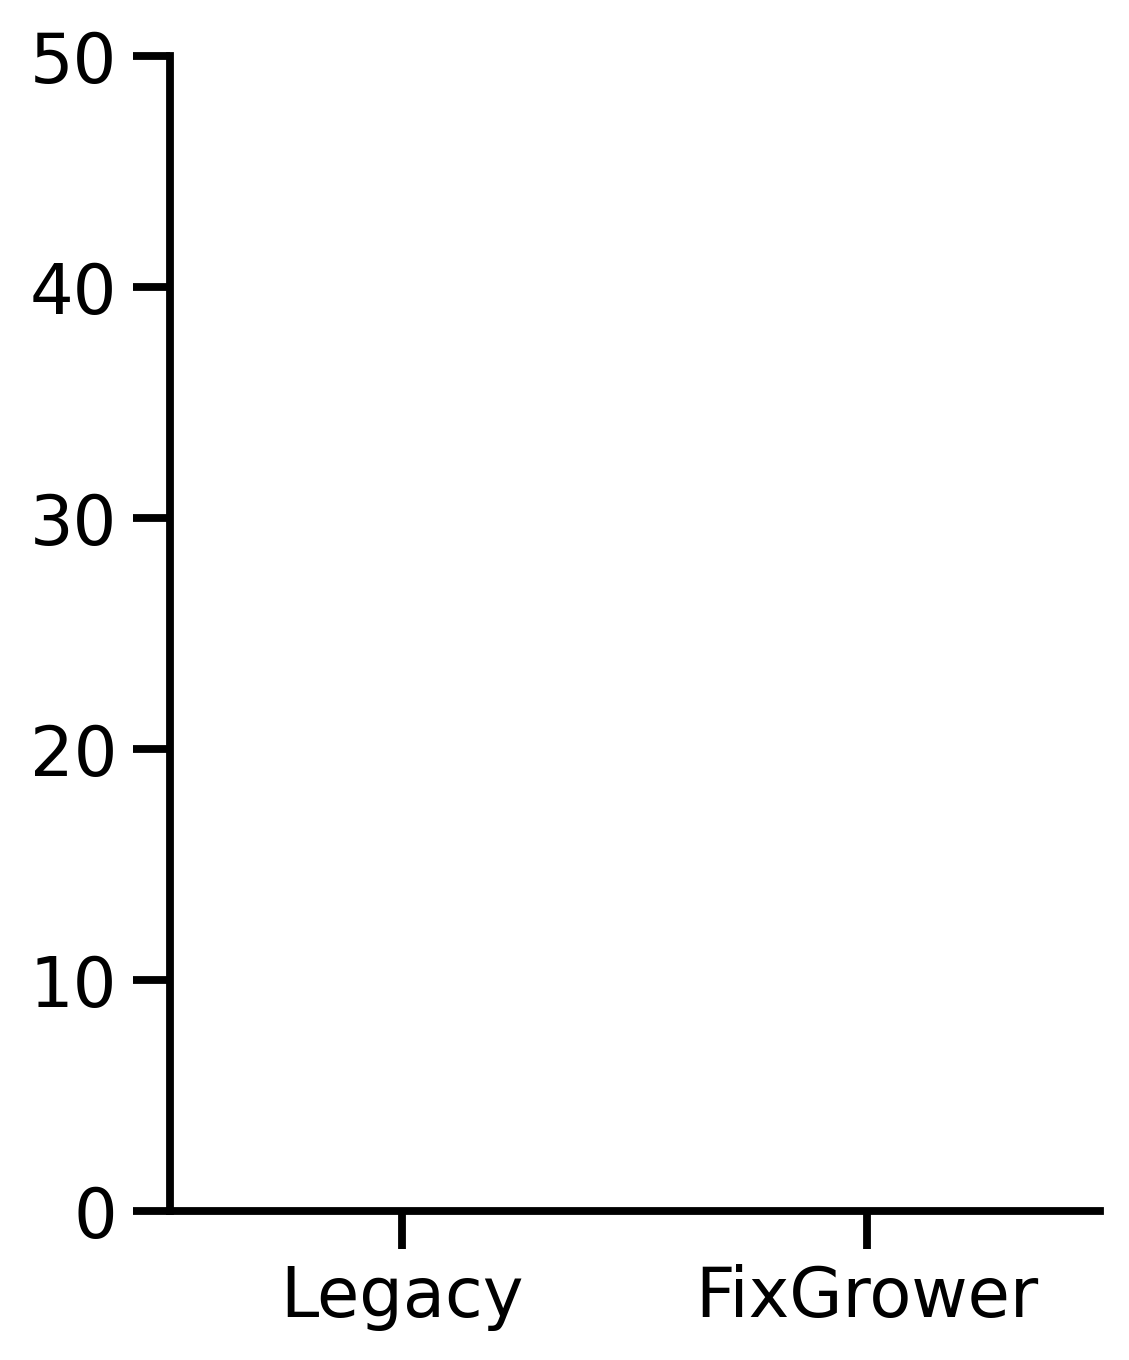

In [93]:
fig, ax = plt.subplots(figsize=(4,5), dpi=300)
sns.despine()
palette = ["white", "white"]
sns.pointplot(
    probe_violation_df, x="fix_experiment", order=c.HUE_ORDER_EXP, 
    hue_order=c.HUE_ORDER_EXP, y="violation_rate", ax=ax, linestyle=None, errorbar="se", hue="fix_experiment", palette=palette
)

sns.stripplot(
    probe_violation_df, x="fix_experiment", order=c.HUE_ORDER_EXP, hue_order= c.HUE_ORDER_EXP, y="violation_rate", ax=ax, hue="fix_experiment", palette=palette, alpha=0.25, s=7
)
ax.set_xticklabels(["Legacy", "FixGrower"])
ax.set(xlabel="", ylabel="", ylim=(0, 50))

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_58675/3777834288.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Legacy", "FixGrower"])


[Text(0.5, 0, ''), Text(0, 0.5, ''), (0.0, 50.0)]

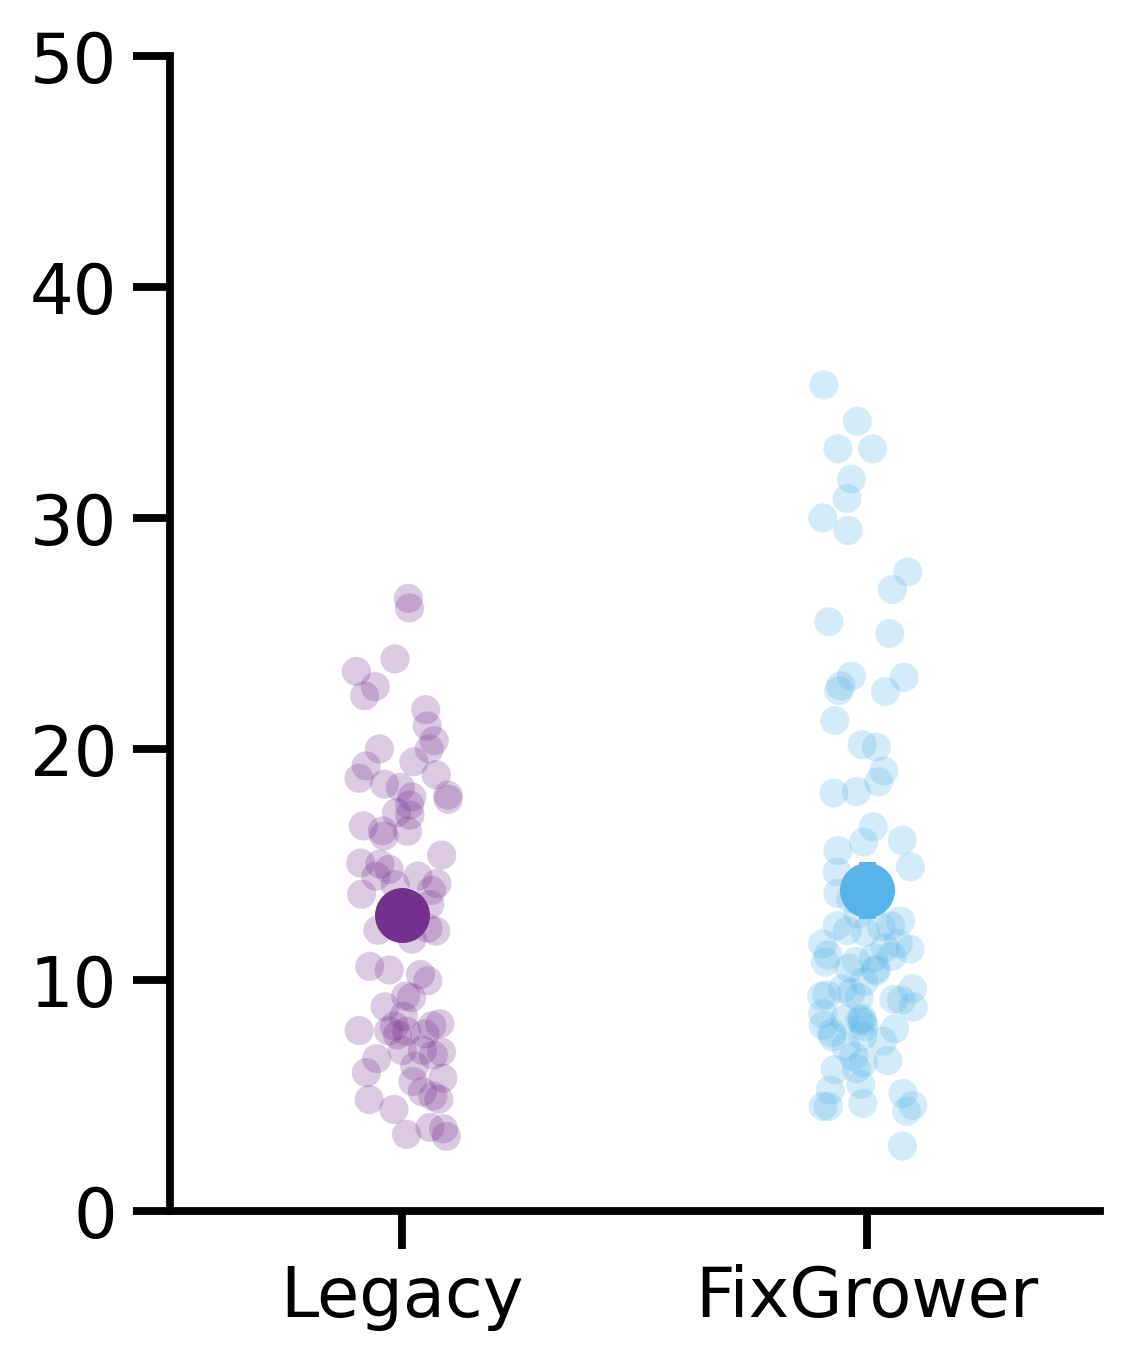

In [94]:
fig, ax = plt.subplots(figsize=(4,5), dpi=300)
sns.despine()
sns.pointplot(
    probe_violation_df, x="fix_experiment", order=c.HUE_ORDER_EXP, 
    hue_order=c.HUE_ORDER_EXP, y="violation_rate", ax=ax, linestyle=None, errorbar="se", hue="fix_experiment", palette=c.EXP_PALETTE
)

sns.stripplot(
    probe_violation_df, x="fix_experiment", order=c.HUE_ORDER_EXP, hue_order= c.HUE_ORDER_EXP, y="violation_rate", ax=ax, hue="fix_experiment", palette=c.EXP_PALETTE, alpha=0.25, s=7
)
ax.set_xticklabels(["Legacy", "FixGrower"])
ax.set(xlabel="", ylabel="", ylim=(0, 50))

## Relationship


In [97]:
OUTLIER_ANIMAL = 'R047'
target_time_df = (
    tdf.query("has_reached_target_fixation == True")
    .groupby(["animal_id", "fix_experiment"], observed=True)[
        f"days_relative_to_stage_5"
    ]
    .min()
    .reset_index()
)

target_time_df.rename(
    columns={f"days_relative_to_stage_5": "days_to_target"},
    inplace=True,
)

target_time_df.head()


,animal_id,fix_experiment,days_to_target
0,R040,V1,13
1,R041,V2,11
2,R042,V1,12
3,R043,V2,6
4,R045,V2,11


In [98]:
probe_time_and_viol_df = pd.merge(probe_violation_df, target_time_df, on=["animal_id", "fix_experiment"], how="left")
probe_time_and_viol_df["outlier"] = probe_time_and_viol_df["animal_id"] == OUTLIER_ANIMAL
probe_time_and_viol_df.head()


,date,fix_experiment,animal_id,stage,days_relative_to_stage_10,violation_rate,combined_stage,days_to_target,outlier
0,2024-08-07,V2,R043,9.0,-5.0,14.673913,True,6,False
1,2024-08-08,V2,R043,9.0,-4.0,10.501193,True,6,False
2,2024-08-09,V2,R043,9.0,-3.0,8.184143,True,6,False
3,2024-08-10,V2,R043,9.0,-2.0,4.514673,True,6,False
4,2024-08-11,V1,R042,9.0,-5.0,19.444444,True,12,False


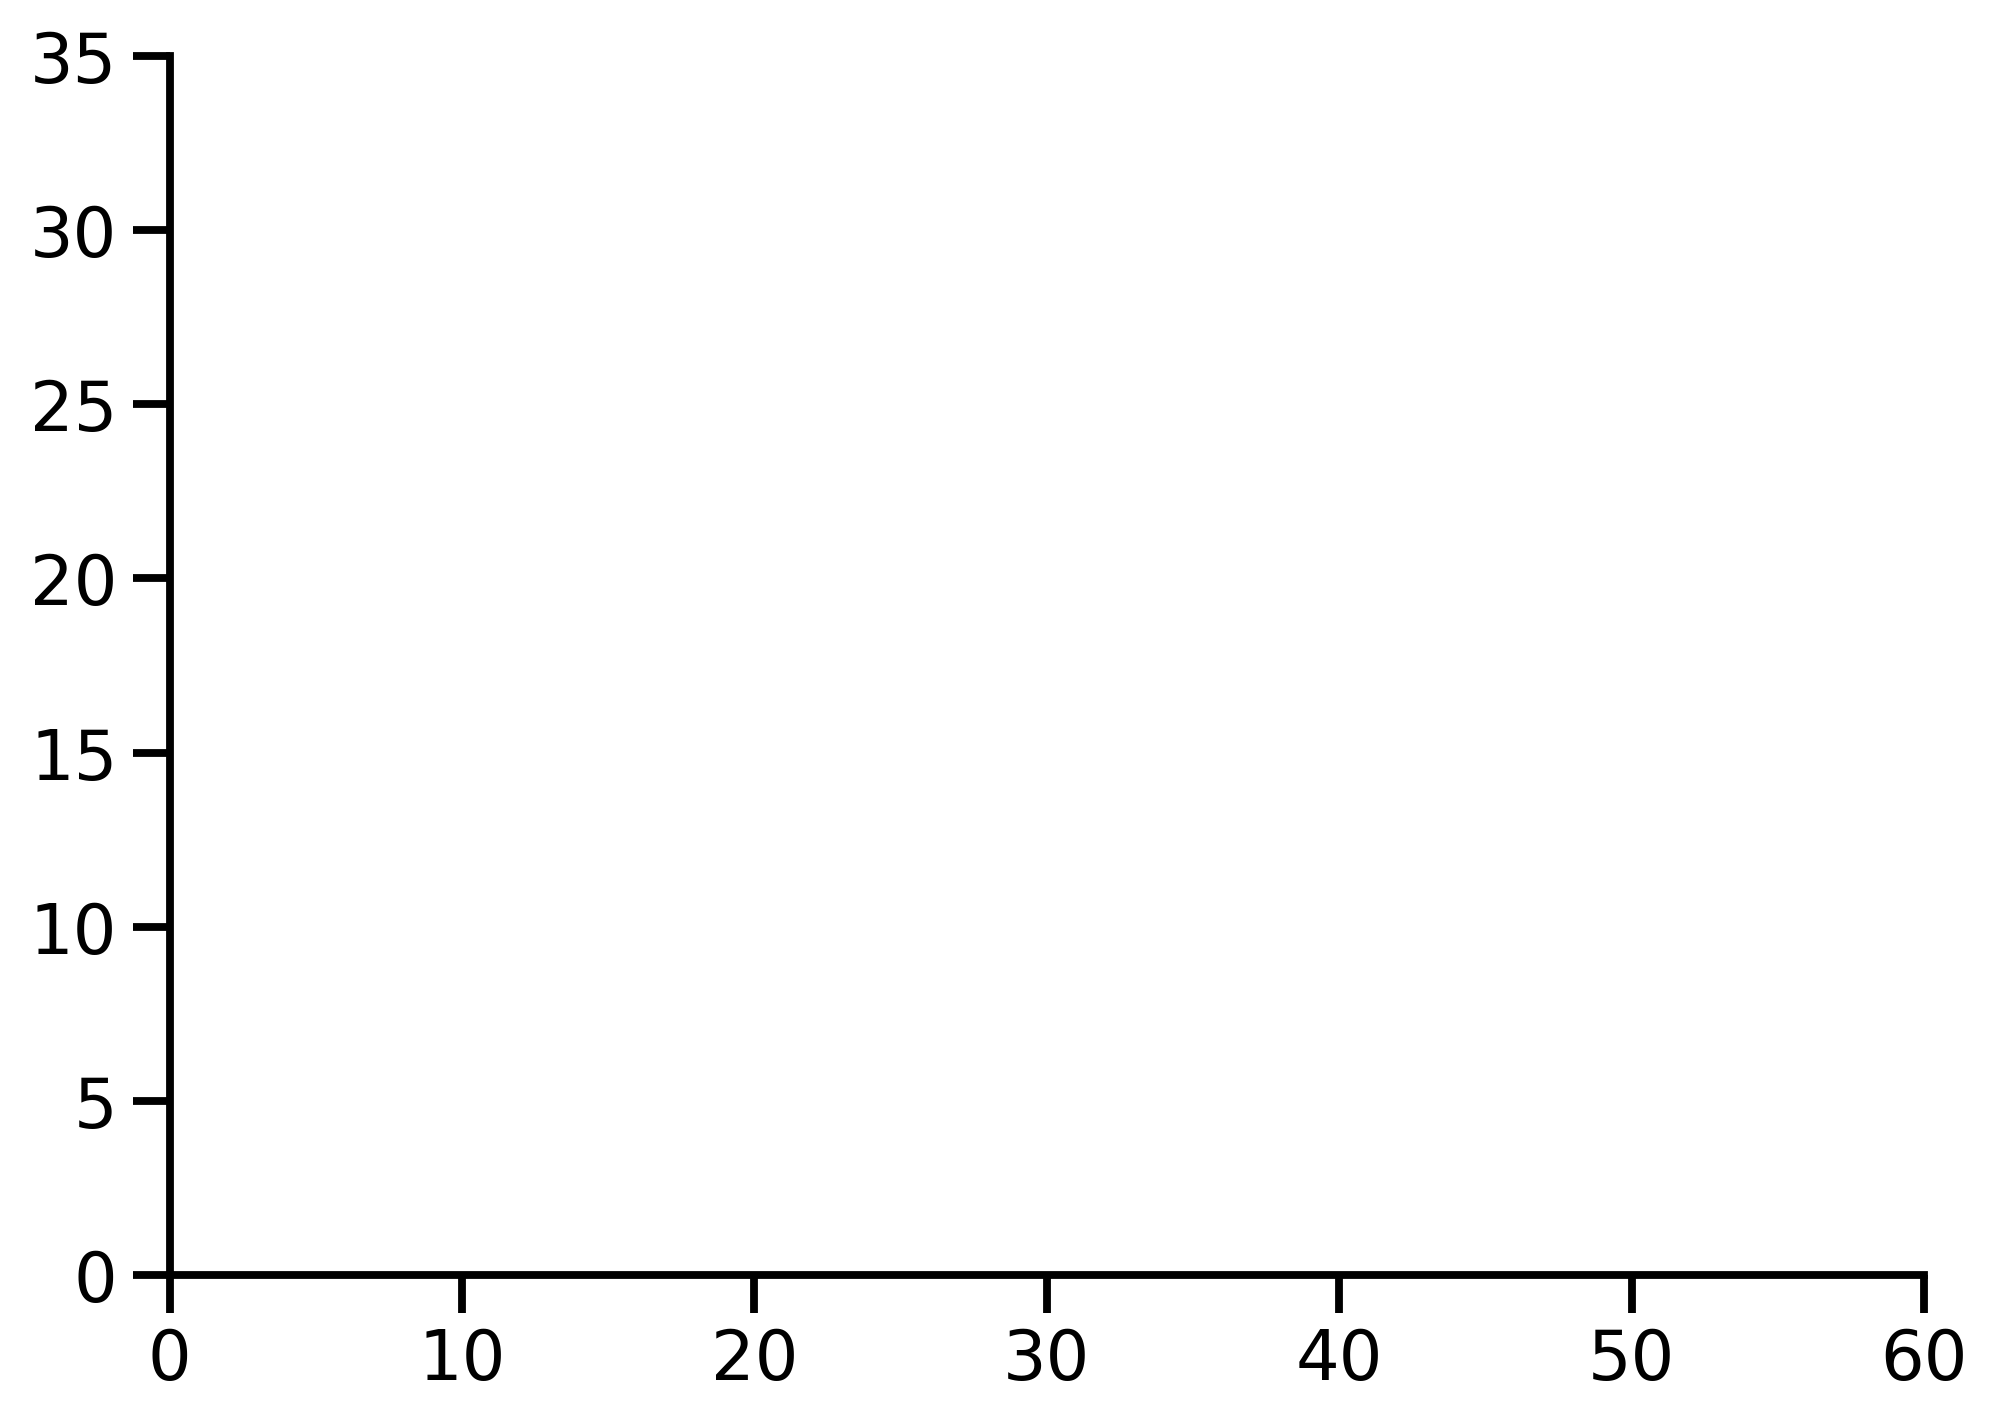

In [110]:
fig, ax = plt.subplots(figsize=(7,5), dpi=300)
import warnings
warnings.filterwarnings(
    "ignore",
    message="Calling float on a single element Series is deprecated"
)

# …then your plotting code as before…
sns.lineplot(
    data=probe_time_and_viol_df.query("outlier == False"),
    x="days_to_target",
    y="violation_rate",
    hue="fix_experiment",
    palette=["white", "white"],
    hue_order=c.HUE_ORDER_EXP,
    style="animal_id",
    marker="o",
    markersize=10,  # Increase marker size
    linestyle="",
    err_style="bars",
    errorbar="se",
    ax=ax,
)

_ = ax.set(
    xlim=(0, 60),
    ylim=(0, 35),
    xlabel="",
    ylabel="",
)

sns.despine()
plt.tight_layout()


ax.get_legend().remove()

plt.tight_layout()


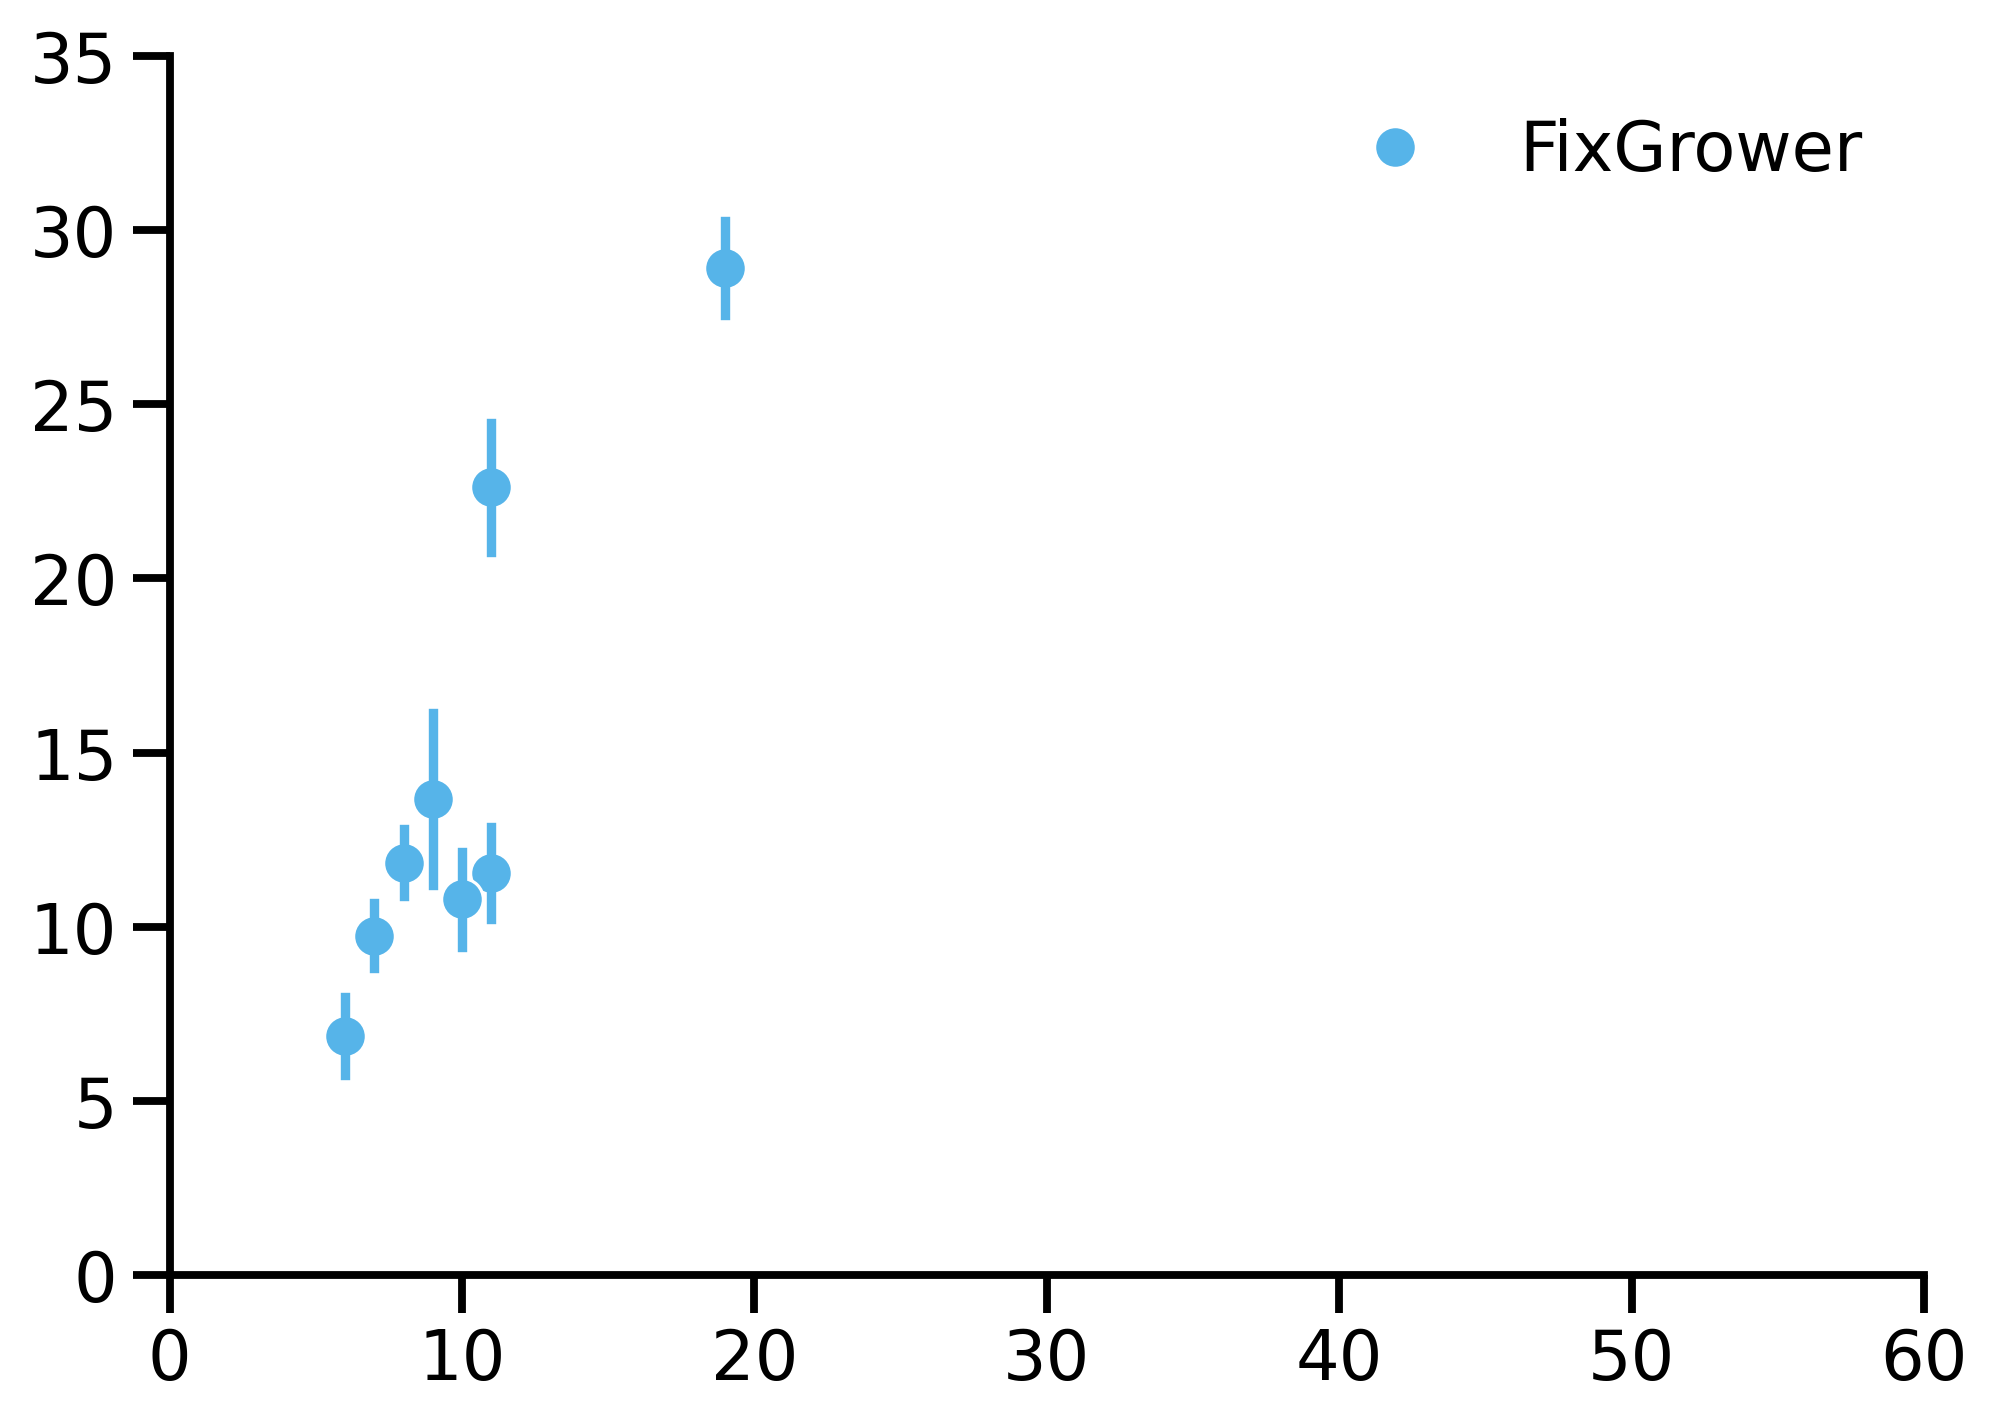

In [111]:
fig, ax = plt.subplots(figsize=(7,5), dpi=300)
import warnings
warnings.filterwarnings(
    "ignore",
    message="Calling float on a single element Series is deprecated"
)

# …then your plotting code as before…
sns.lineplot(
    data=probe_time_and_viol_df.query("outlier == False"),
    x="days_to_target",
    y="violation_rate",
    hue="fix_experiment",
    palette=["white", c.V2_COLOR],
    hue_order=c.HUE_ORDER_EXP,
    style="animal_id",
    marker="o",
    markersize=10,  # Increase marker size
    linestyle="",
    err_style="bars",
    errorbar="se",
    ax=ax,
)

_ = ax.set(
    xlim=(0, 60),
    ylim=(0, 35),
    xlabel="",
    ylabel="",
)

sns.despine()
plt.tight_layout()


ax.get_legend().remove()
handles, _ = ax.get_legend_handles_labels()

ax.legend(handles=handles[2:3], labels=legend_labels[1:2], frameon=False)
plt.tight_layout()


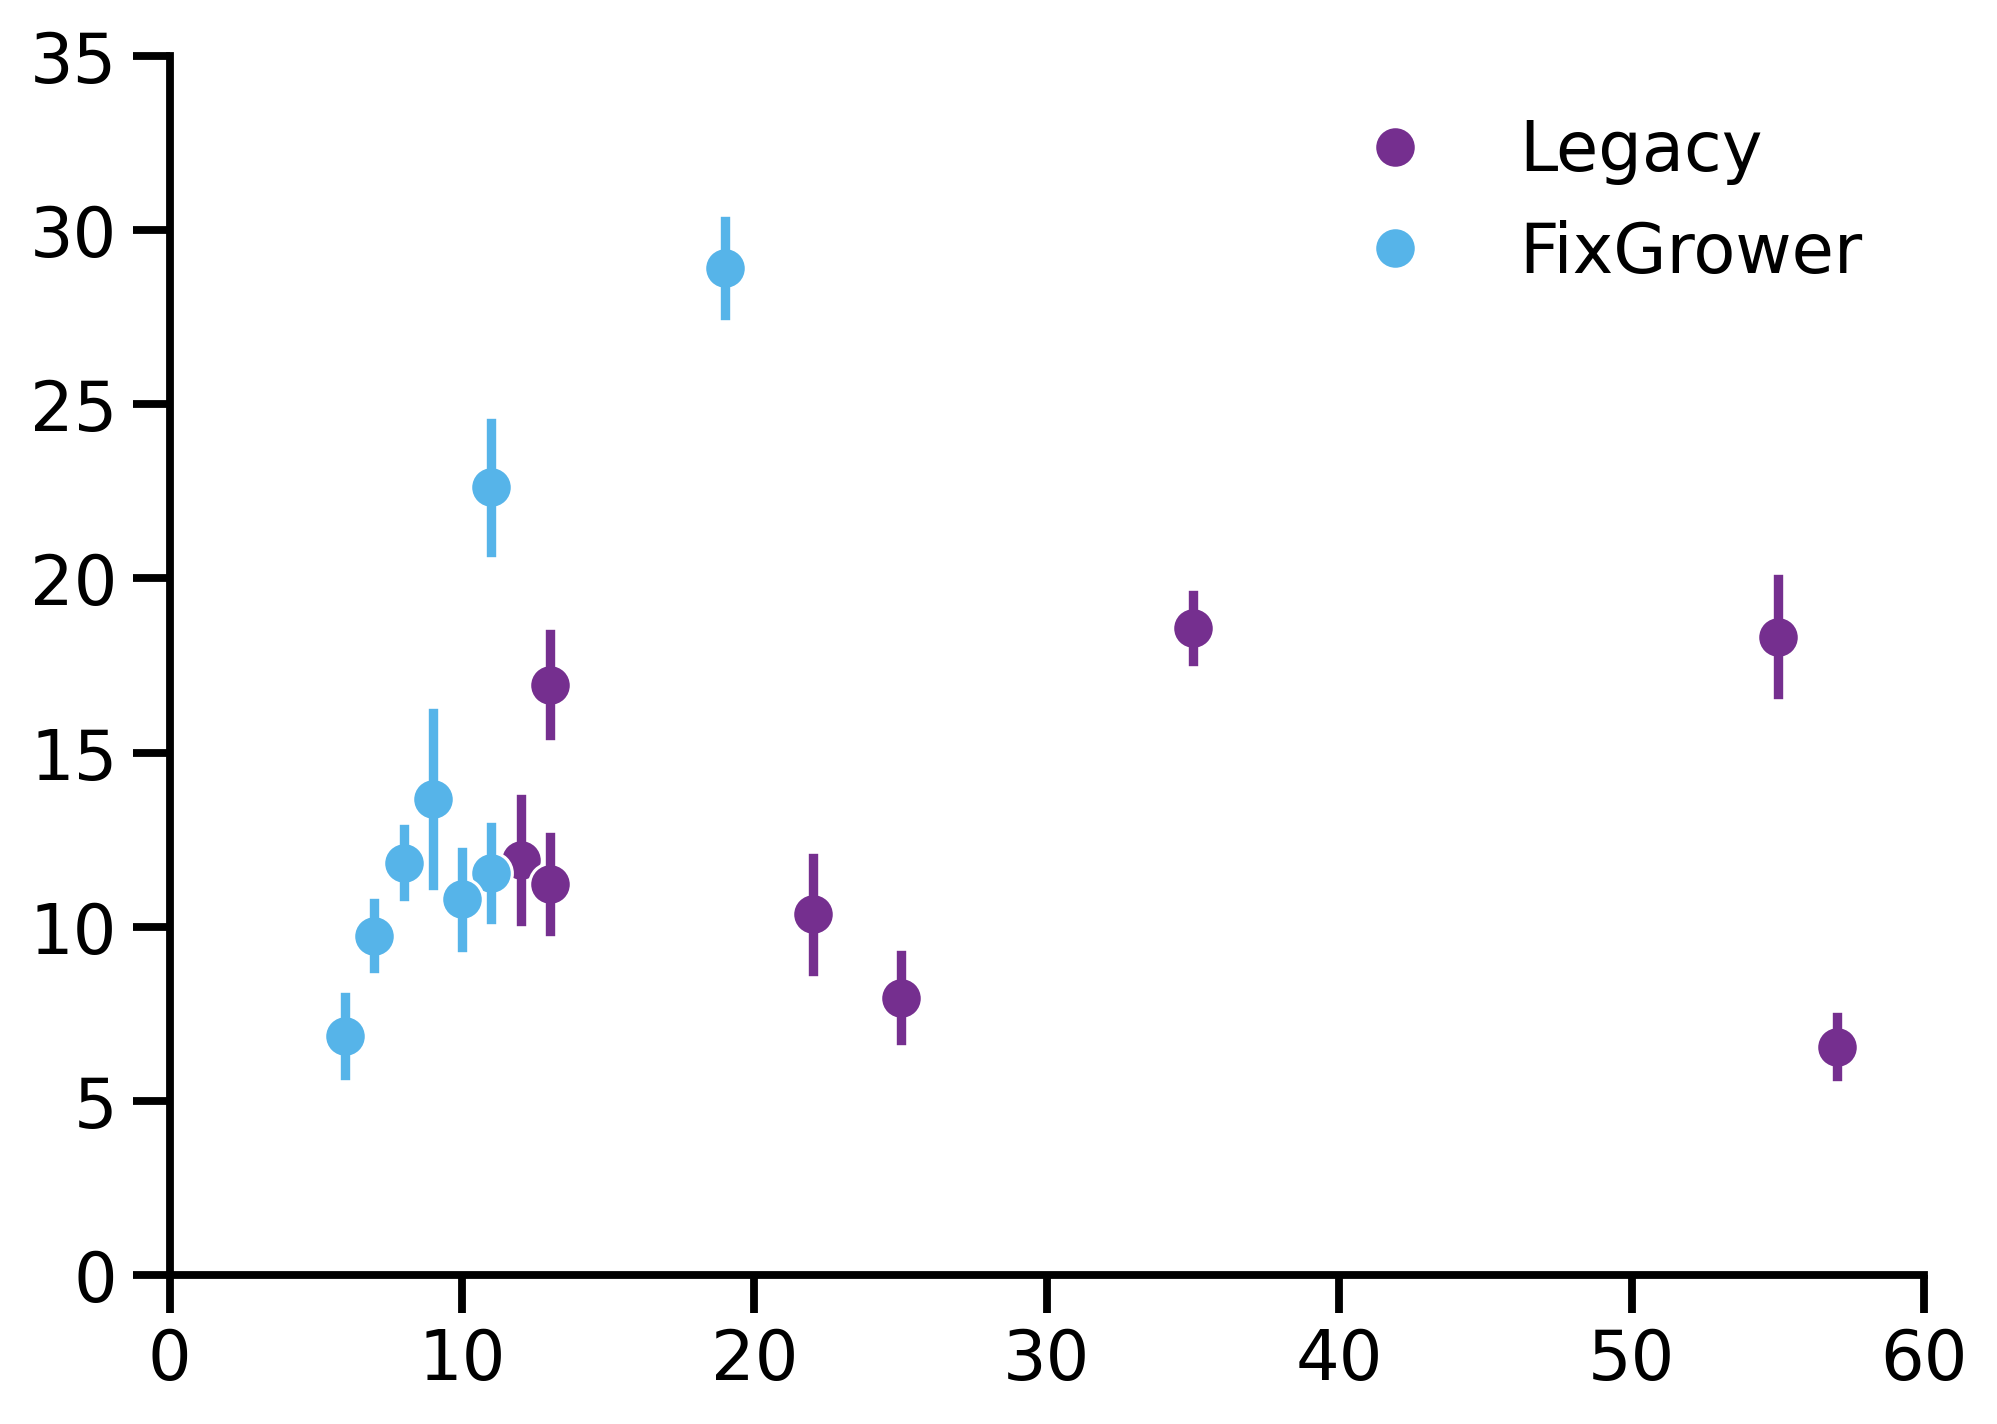

In [112]:
fig, ax = plt.subplots(figsize=(7,5), dpi=300)
import warnings
warnings.filterwarnings(
    "ignore",
    message="Calling float on a single element Series is deprecated"
)

# …then your plotting code as before…
sns.lineplot(
    data=probe_time_and_viol_df.query("outlier == False"),
    x="days_to_target",
    y="violation_rate",
    hue="fix_experiment",
    palette=c.EXP_PALETTE,
    hue_order=c.HUE_ORDER_EXP,
    style="animal_id",
    marker="o",
    markersize=10,  # Increase marker size
    linestyle="",
    err_style="bars",
    errorbar="se",
    ax=ax,
)

_ = ax.set(
    xlim=(0, 60),
    ylim=(0, 35),
    xlabel="",
    ylabel="",
)

sns.despine()
plt.tight_layout()


ax.get_legend().remove()
handles, _ = ax.get_legend_handles_labels()

ax.legend(handles=handles[1:3], labels=legend_labels, frameon=False)
plt.tight_layout()
